In [114]:
'''
Remake Fig. 1 (include eboss footprint), 
remove Fig. 3
Move appendix stuff (later figures) to section 3, as appropriate, what is in Fig. 4 probably goes to this
Remake Fig. 5, 6, 7, 8 (clarify), 10 (add weight_systot)
Figure out what is going on (and definitely what you did) with fracin stuff
Fig. 9 w(theta), xi0, xi2, xi4(?)
Figs 10 and 11 should go before Fig. 9; order should become 11 (compare obiwan and data), 10, 9
Fig. 23-26 maybe goes in section 3
Everything after clustering results, move to appendix? (consider removing)
        go through and decide what is important to publish
        what is important information to save and act on for later development
'''
!pwd


/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/ipynb


In [115]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp', 'vstack', 'plot', 'colors', 'uniform', 'angle', 'maximum', 'norm', 'hstack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


44434

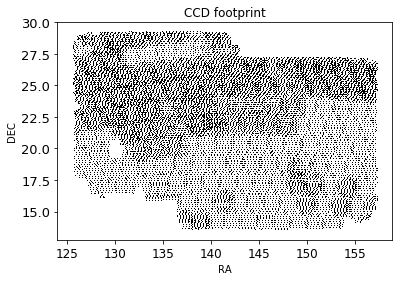

In [116]:
#fig1. ccd footprint
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/legacysurveydir_dr3/'
dat = 'survey-ccds-ebossDR3.fits.gz'
ccds = fits.getdata(topdir+dat)
ccds = ccds[ccds['dec']>10]
plt.plot(ccds['ra'],ccds['dec'],'k,')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('CCD footprint')
len(ccds)

In [117]:
#anand's ccd
ccds = fits.getdata('/global/cscratch1/sd/raichoor/eBOSS_ELG_FromUtah/ccds-annotated-eboss23.fits.gz')
#plt.plot(ccds['ra'],ccds['dec'],'k,')
#plt.xlabel('RA')
#plt.ylabel('DEC')
#plt.title('CCD footprint')
#len(ccds)
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/eBOSS_ELG_full_ALL_v4.dat_chunk23.fits')
len(dat[dat['type']=='PSF'])/len(dat)


0.04479355329815996

In [112]:
#keep fig2
#remove Fig. 3
#remake fig 23
#only half of my obiwan output has z, as I lost info for previous input randoms...
#obiwan elgs in ngc
obiwan_w_z = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/chunk23_final_chunk23_really_masked.fits')
#sim data, no redshift
sim = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sim_chunk23_final_chunk23_really_masked.fits')
#sim data, w/ redshift
sim_origin = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/chunk23_final/randoms_seed_0_startid_1.fits')
#real ngc elgs
elg = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/eBOSS_ELG_full_ALLdata-vDR16.fits')
elg = elg[((elg['chunk']=='eboss22')|(elg['chunk']=='eboss21'))&(elg['z_ok']==True)]
#this is for the comparison in rhalf
final_tab = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sweep_chunk23_w_z.fits')
##ignore the following until the ##start tag

In [ ]:
dd = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/eBOSS_ELG_clustering_random-NGC-vDR16.fits')
elg_ngc = dd[(dd['chunk']=='eboss23')]

plt.plot(obiwan_w_z['ra'],obiwan_w_z['dec'],'b,')
plt.plot(elg_ngc['ra'],elg_ngc['dec'],'r,')

from astropy.table import Table
tt = Table(elg_ngc)
tt.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/eBOSS_ELG_clustering_random-NGC-vDR16_chunk23.fits')

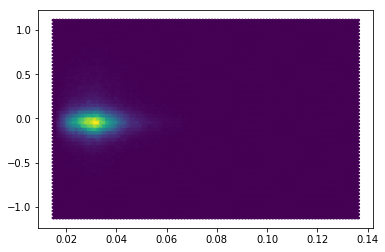

In [36]:
plt.hexbin(obiwan_w_z['ebv'],obiwan_w_z['flux_g']-obiwan_w_z['gflux'])
#plt.plot([1,3],[0,0],'b--')

In [8]:
#collect sweep files for r_half analysis
import glob
import os
from astropy.table import Table
from astropy.table import vstack

topdir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr3/sweep/3.1/'
filenames = glob.glob(topdir+'*')
chunk23_files = []
for filename in filenames:
    brickname1 = os.path.basename(filename)[6:13]
    brickname2 = os.path.basename(filename)[14:21]
    if (brickname1[3]=='p' and int(brickname1[:3])>120 and int(brickname1[:3])<160 and\
       int(brickname1[4:7])>13 and int(brickname1[4:7])<30) or \
        (brickname2[3]=='p' and int(brickname2[:3])>120 and int(brickname2[:3])<160 and\
       int(brickname2[4:7])>13 and int(brickname2[4:7])<30):
        chunk23_files.append(filename)

sweep_dat = None        
for filename in chunk23_files:
    dat = Table.read(filename)
    if sweep_dat is None:
        sweep_dat = dat
    else:
        sweep_dat = vstack((sweep_dat,dat))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-a8fcda2ae8c2>", line 22, in <module>
    sweep_dat = vstack((sweep_dat,dat))
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/operations.py", line 190, in vstack
    out = _vstack(tables, join_type, col_name_map, metadata_conflicts)
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/operations.py", line 759, in _vstack
    out[out_name][idx0:idx1] = array[name]
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/column.py", line 915, in __setitem__
    self.data[index] = value
KeyboardInterrupt

During handli

KeyboardInterrupt: 

In [ ]:
def ELG_selection_for_dr3(tractor,region='ngc'):
    import numpy as n
    value_g=tractor['DECAM_DEPTH'][:,1]
    value_r=tractor['DECAM_DEPTH'][:,2]
    value_z=tractor['DECAM_DEPTH'][:,4]
    gL = 62.79716079 
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75  
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)
    
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,1] / tractor['DECAM_MW_TRANSMISSION'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,2] / tractor['DECAM_MW_TRANSMISSION'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,4] / tractor['DECAM_MW_TRANSMISSION'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(color_sgc)&(depth_selection_sgc)
    selection_ngc =(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])   
flag,output = ELG_selection_for_dr3(sweep_dat)
output.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sweep_chunk23.fits')

In [4]:
sweep_elg = Table.read('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sweep_chunk23_really_masked.fits')
sweep_elg_exp = sweep_elg[(sweep_elg['TYPE']=='EXP')]

In [10]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
angle = 1.5/3600
c1 = SkyCoord(ra=sweep_elg_exp['RA']*u.degree, dec=sweep_elg_exp['DEC']*u.degree)
c2 = SkyCoord(ra=elg['ra']*u.degree, dec=elg['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= angle
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
tc = sweep_elg_exp[idx1]
sm = elg[idx2]

redshift = sm['Z']
final_tab = hstack((tc,Table([redshift],names=('redshift',))))

NameError: name 'sweep_elg_exp' is not defined

In [94]:
final_tab.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sweep_chunk23_w_z.fits')

In [6]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
sweep_elg = Table.read('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sweep_chunk23_really_masked.fits')
angle = 1./3600
c1 = SkyCoord(ra=sweep_elg['RA']*u.degree, dec=sweep_elg['DEC']*u.degree)
c2 = SkyCoord(ra=elg['ra']*u.degree, dec=elg['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= angle
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
tc = sweep_elg[idx1]
sm = elg[idx2]

redshift = sm['Z']
final_tab = hstack((tc,Table([redshift],names=('redshift',))))
final_tab.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sweep_chunk23_w_z_all.fits')

NameError: name 'elg' is not defined

In [60]:
##start
# Libraries
from scipy.stats import kde
 
def plot_maker(x_col,y_col,x_label=None,y_lim=None,y_label='redshift'):
    # Create data: 
    x, y = elg[x_col],elg[y_col]
    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # contour
    import matplotlib.colors as mcolors
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(1,0,0,i) for i in np.linspace(0.2,1,9)]
    colors[0] = (0, 0, 1, 0.0)

    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)

    if y_lim is not None:
        plt.gca().set_ylim(y_lim)
    # Create data: 200 points
    if x_col=='g':
        x, y = sim_origin['g'][::10],sim_origin['nn_redshift'][::10]
    if x_col == 'gr':
        x, y = sim_origin['g'][::10]-sim_origin['r'][::10],sim_origin['nn_redshift'][::10]
    if x_col == 'rz':
        x, y = sim_origin['r'][::10]-sim_origin['z'][::10],sim_origin['nn_redshift'][::10]
 

    nbins = 50
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))


    # contour
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(0,0,1,i) for i in np.linspace(0,0.7,9)]
    colors[0] = (0, 0, 1, 0.0)
    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)
    
    
    
def plot_maker_rhalf(x_label=None,y_lim=None,y_label='redshift'):
    # Create data: 
    x, y = final_tab[final_tab['TYPE']=='EXP']['SHAPEEXP_R'],final_tab[final_tab['TYPE']=='EXP']['redshift']
    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # contour
    import matplotlib.colors as mcolors
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(1,0,0,i) for i in np.linspace(0.2,1,9)]
    colors[0] = (0, 0, 1, 0.0)

    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)

    if y_lim is not None:
        plt.gca().set_ylim(y_lim)
    plt.gca().set_xlim((0,1.5))
    # Create data: 200 points
    x, y = sim_origin[sim_origin['n']==1]['rhalf'][::10],sim_origin[sim_origin['n']==1]['nn_redshift'][::10]

    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))


    # contour
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(0,0,1,i) for i in np.linspace(0,0.7,9)]
    colors[0] = (0, 0, 1, 0.0)
    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


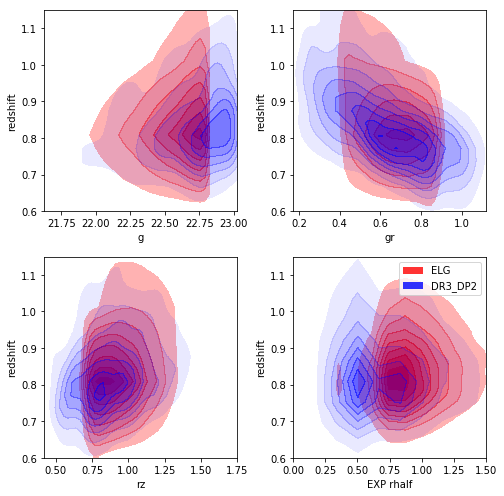

In [61]:
plt.figure(figsize = (7,7))    
plt.subplot(2,2,1)    
plot_maker('g','Z',x_label='g',y_lim=((0.6,1.15)))
plt.subplot(2,2,2)
plot_maker('gr','Z',x_label='gr',y_lim=((0.6,1.15)))
proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.subplot(2,2,3)
plot_maker('rz','Z',x_label='rz',y_lim=((0.6,1.15)))
proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.subplot(2,2,3)
plt.tight_layout()
plt.subplot(2,2,4)
plot_maker_rhalf(x_label='EXP rhalf',y_lim=((0.6,1.15)))
proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.legend(proxy, ["ELG","DR3_DP2"])

In [62]:
# Libraries
from scipy.stats import kde
 
def plot_maker(x_col,y_col,x_label=None,y_lim=None,y_label='redshift'):
    import numpy as n
    # Create data: 
    x, y = elg[x_col],elg[y_col]
    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # contour
    import matplotlib.colors as mcolors
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(1,0,0,i) for i in np.linspace(0.2,1,9)]
    colors[0] = (0, 0, 1, 0.0)

    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)

    if y_lim is not None:
        plt.gca().set_ylim(y_lim)
    # Create data: 200 points
    if x_col=='g':
        g     = 22.5 - 2.5 * n.log10(obiwan_w_z['flux_g'] / obiwan_w_z['mw_transmission_g_1'])
        x, y = g,obiwan_w_z['nn_redshift']
    if x_col == 'gr':
        g     = 22.5 - 2.5 * n.log10(obiwan_w_z['flux_g'] / obiwan_w_z['mw_transmission_g_1'])
        r     = 22.5 - 2.5 * n.log10(obiwan_w_z['flux_r'] / obiwan_w_z['mw_transmission_r_1'])
        x, y = g-r,obiwan_w_z['nn_redshift']
    if x_col == 'rz':
        r     = 22.5 - 2.5 * n.log10(obiwan_w_z['flux_r'] / obiwan_w_z['mw_transmission_r_1'])
        z     = 22.5 - 2.5 * n.log10(obiwan_w_z['flux_z'] / obiwan_w_z['mw_transmission_z_1'])
        x, y = r-z,obiwan_w_z['nn_redshift']
 

    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))


    # contour
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(0,0,1,i) for i in np.linspace(0,0.7,9)]
    colors[0] = (0, 0, 1, 0.0)
    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)
    
    
    
def plot_maker_rhalf(x_label=None,y_lim=None,y_label='redshift'):
    # Create data: 
    x, y = final_tab[final_tab['TYPE']=='EXP']['SHAPEEXP_R'],final_tab[final_tab['TYPE']=='EXP']['redshift']
    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # contour
    import matplotlib.colors as mcolors
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(1,0,0,i) for i in np.linspace(0.2,1,9)]
    colors[0] = (0, 0, 1, 0.0)

    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)

    if y_lim is not None:
        plt.gca().set_ylim(y_lim)
    plt.gca().set_xlim((0,1.7))
    # Create data: 200 points
    x, y = obiwan_w_z[obiwan_w_z['type']=='EXP']['shapeexp_r'],obiwan_w_z[obiwan_w_z['type']=='EXP']['nn_redshift']
 

    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))


    # contour
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors = [(0,0,1,i) for i in np.linspace(0,0.7,9)]
    colors[0] = (0, 0, 1, 0.0)
    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)

'\nobiwan vs real ELGs this plot can be used sometime later\n'

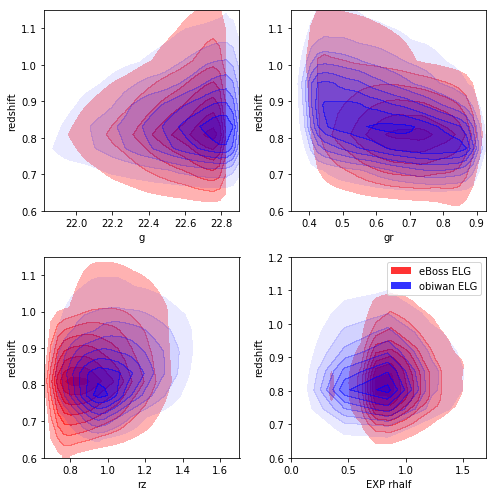

In [63]:
plt.figure(figsize = (7,7))    
plt.subplot(2,2,1)    
plot_maker('g','Z',x_label='g',y_lim=((0.6,1.15)))
plt.subplot(2,2,2)
plot_maker('gr','Z',x_label='gr',y_lim=((0.6,1.15)))
proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.subplot(2,2,3)
plot_maker('rz','Z',x_label='rz',y_lim=((0.6,1.15)))
plt.subplot(2,2,4)
plot_maker_rhalf(x_label='EXP rhalf',y_lim=((0.6,1.2)))
proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.tight_layout()

proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.legend(proxy, ["eBoss ELG","obiwan ELG"])
'''
obiwan vs real ELGs this plot can be used sometime later
'''

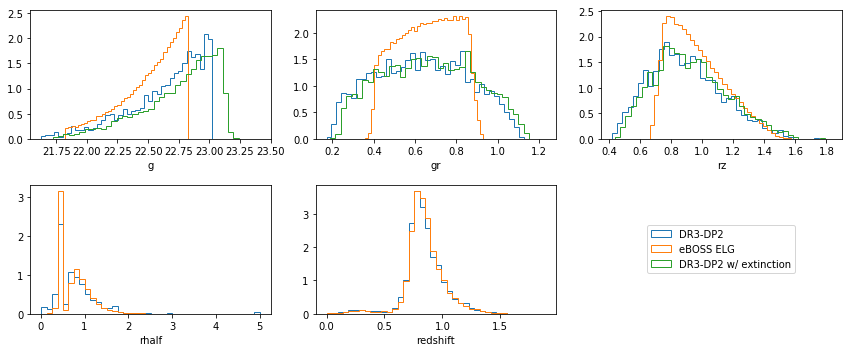

In [64]:
#fig 24
plt.figure(figsize = (12,5))
plt.subplot(2,3,1)
g_ext = 22.5 - 2.5 * np.log10(sim['gflux'])
p11,bins,_ = plt.hist(sim_origin['g'],label = 'DR3-DP2',normed = True,histtype='step',bins=40)
p12 = plt.hist(elg['g'],label = 'eBOSS ELG',normed = True,histtype='step',bins=40)
p13 = plt.hist(g_ext,label = 'eBOSS ELG',normed = True,histtype='step',bins=40)
plt.xlabel('g')
plt.subplot(2,3,2)
g_ext = 22.5 - 2.5 * np.log10(sim['gflux'])
r_ext = 22.5 - 2.5 * np.log10(sim['rflux'])
p11,bins,_ = plt.hist(sim_origin['g']-sim_origin['r'],label = 'DR3-DP2',normed = True,histtype='step',bins=40)
p12 = plt.hist(elg['gr'],label = 'eBOSS ELG',normed = True,histtype='step',bins=40)
p13 = plt.hist(g_ext-r_ext,label = 'eBOSS ELG',normed = True,histtype='step',bins=40)

plt.xlabel('gr')
plt.subplot(2,3,3)
r_ext = 22.5 - 2.5 * np.log10(sim['rflux'])
z_ext = 22.5 - 2.5 * np.log10(sim['zflux'])
p11,bins,_ = plt.hist(sim_origin['r']-sim_origin['z'],label = 'DR3-DP2',normed = True,histtype='step',bins=40)
p12 = plt.hist(elg['rz'],label = 'eBOSS ELG',normed = True,histtype='step',bins=40)
p13 = plt.hist(r_ext-z_ext,label = 'eBOSS ELG',normed = True,histtype='step',bins=40)

plt.xlabel('rz')
plt.subplot(2,3,4)
p11,bins,_ = plt.hist(sim_origin['rhalf'],label = 'DR3-DP2',normed = True,histtype='step',bins=40)
p12 = plt.hist(final_tab[final_tab['fracdev']<0.5]['SHAPEEXP_R'],label = 'eBOSS ELG',normed = True,histtype='step',bins=bins)
plt.xlabel('rhalf')

plt.subplot(2,3,5)
p11,bins,_ = plt.hist(sim_origin['nn_redshift'],label = 'DR3-DP2',normed = True,histtype='step',bins=40)
p12 = plt.hist(elg['Z'],label = 'eBOSS ELG',normed = True,histtype='step',bins=bins)
plt.xlabel('redshift')

plt.subplot(2,3,6)

proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False),\
        plt.Rectangle((0,0),1,1,ec = '#2ca02c',fill=False)]
plt.legend(proxy, ["DR3-DP2","eBOSS ELG","DR3-DP2 w/ extinction"],loc='center')
plt.gca().axis('off')
plt.tight_layout()

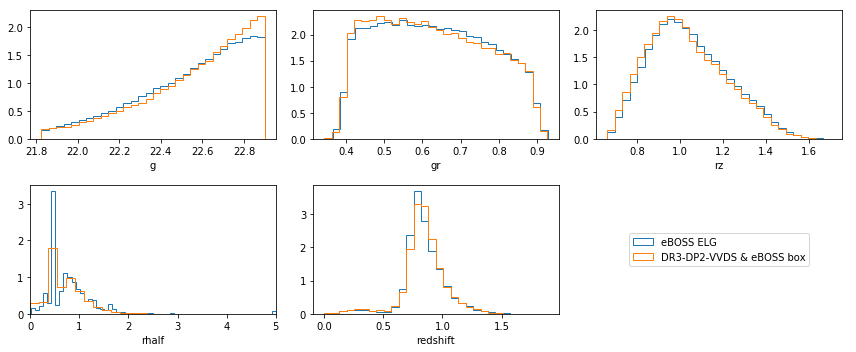

In [71]:
#fig 24
#real ngc elgs
#you can see that g band does not match, and this is because obiwan is sampled from sgc, (ngc g band is not deep enough)
dd = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/eBOSS_ELG_full_ALLdata-vDR16.fits')
elg_ngc = dd[(dd['chunk']=='eboss23')&(dd['z_ok']==True)]
#dd = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/eBOSS_ELG_full_ALLdata-vDR16.fits')
#elg_sgc = dd[(dd['chunk']=='eboss21')|(dd['chunk']=='eboss22')]
plt.figure(figsize = (12,5))
plt.subplot(2,3,1)
g_obiwan = 22.5 - 2.5 * np.log10(obiwan_w_z['flux_g']/ obiwan_w_z['mw_transmission_g_1'])
r_obiwan = 22.5 - 2.5 * np.log10(obiwan_w_z['flux_r']/ obiwan_w_z['mw_transmission_r_1'])
z_obiwan = 22.5 - 2.5 * np.log10(obiwan_w_z['flux_z']/ obiwan_w_z['mw_transmission_z_1'])
gr_obiwan = g_obiwan - r_obiwan
rz_obiwan = r_obiwan - z_obiwan
p13 = plt.hist(g_obiwan,label = 'obiwan ELG',normed = True,histtype='step',bins=30)
p12 = plt.hist(elg_ngc['g'],label = 'eBOSS ELG',normed = True,histtype='step',bins=30)
plt.xlabel('g')

plt.subplot(2,3,2)
p13 = plt.hist(gr_obiwan,label = 'obiwan ELG',normed = True,histtype='step',bins=30)
p12 = plt.hist(elg_ngc['gr'],label = 'eBOSS ELG',normed = True,histtype='step',bins=30)
plt.xlabel('gr')

plt.subplot(2,3,3)
p13 = plt.hist(rz_obiwan,label = 'obiwan ELG',normed = True,histtype='step',bins=30)
p12 = plt.hist(elg_ngc['rz'],label = 'eBOSS ELG',normed = True,histtype='step',bins=30)
plt.xlabel('rz')

plt.subplot(2,3,4)
p11 = plt.hist(sim_origin['rhalf'],label = 'eBOSS ELG',normed = True,histtype='step',bins=60)
p12 = plt.hist(obiwan_w_z[obiwan_w_z['fracdev']<0.5]['SHAPEEXP_R'],label = 'obiwan ELG',normed = True,histtype='step',bins=60)
plt.gca().set_xlim((0,5))
plt.xlabel('rhalf')

plt.subplot(2,3,5)
sim_origin_z = sim_origin#[(sim_origin['redshift']>0.6)&(sim_origin['redshift']<1.1)]
sel = (sim_origin_z['nn_redshift']<2)
p11,bins,_ = plt.hist(sim_origin_z['nn_redshift'][sel],label = 'eBOSS ELG',normed = True,histtype='step',bins=30)
p12 = plt.hist(elg_ngc['Z'][elg_ngc['Z']<2],label = 'obiwan ELG',normed = True,histtype='step',bins=bins)
#p13 = plt.hist(elg_sgc['Z'][elg_sgc['Z']<2],label = 'obiwan ELG sgc',normed = True,histtype='step',bins=30)
plt.xlabel('redshift')
#plt.legend()
plt.subplot(2,3,6)

proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False),\
        plt.Rectangle((0,0),1,1,ec = '#2ca02c',fill=False)]
plt.legend(proxy, ["eBOSS ELG","DR3-DP2-VVDS & eBOSS box"],loc='center')
plt.gca().axis('off')
plt.tight_layout()

In [16]:
'''
sec 3: plot comparing obiwan output properties to eBOSS elg properties

'''


'\nsec 3: plot comparing obiwan output properties to eBOSS elg properties\n\n'

In [17]:
#flg 25?? not sure how this GMM is made...

In [18]:
#fig 26:I don't think it's important to investigat exp&dev. The morpholgical measurement is bad enough...

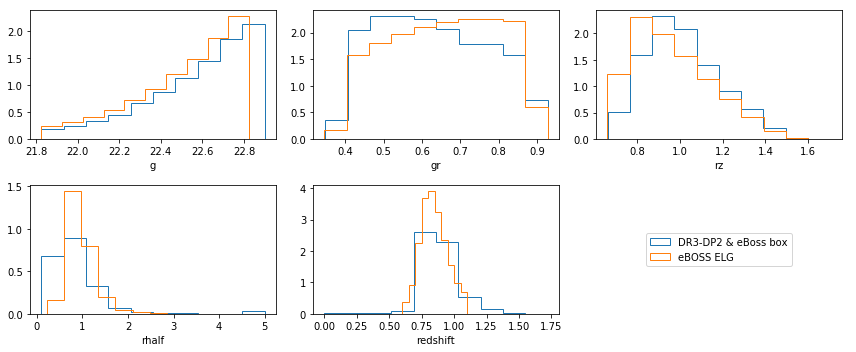

In [72]:
#fig 22: DR3-DP2 in eBoss box
def elg_selection(dat):
    g = dat['g']
    r = dat['r']
    z = dat['z']
    rz = r-z
    gr=g-r
    color_ngc = (g>21.825)&(g<22.9)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773)&(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    return dat[color_ngc]
sim_origin_elg = elg_selection(sim_origin)

plt.figure(figsize = (12,5))
plt.subplot(2,3,1)
p11 = plt.hist(sim_origin_elg['g'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg['g'],label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('g')
plt.subplot(2,3,2)
p11 = plt.hist(sim_origin_elg['g']-sim_origin_elg['r'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg['gr'],label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('gr')
plt.subplot(2,3,3)
p11 = plt.hist(sim_origin_elg['r']-sim_origin_elg['z'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(elg['rz'],label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('rz')
plt.subplot(2,3,4)
p11 = plt.hist(sim_origin_elg['rhalf'],label = 'DR3-DP2',normed = True,histtype='step')
p12 = plt.hist(final_tab[final_tab['TYPE']=='EXP']['SHAPEEXP_R'],label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('rhalf')

plt.subplot(2,3,5)
p11 = plt.hist(sim_origin_elg['nn_redshift'],label = 'DR3-DP2 & eBoss box',normed = True,histtype='step')
p12 = plt.hist(final_tab['redshift'],label = 'eBOSS ELG',normed = True,histtype='step')
plt.xlabel('redshift')

plt.subplot(2,3,6)
proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False)]
plt.legend(proxy, ["DR3-DP2 & eBoss box","eBOSS ELG"],loc='center')
plt.gca().axis('off')

#plt.legend()
plt.tight_layout()

In [20]:
'''
Not important plot
'''
import pandas as pd
index = ['EXP','DEV']
df = pd.DataFrame({'Obiwan':[obiwan_bar[0],obiwan_bar[1]],'Sim':[sim_bar[0],sim_bar[1]]},index=index)
ax = df.plot.barh()

value = np.round(obiwan_bar[0],decimals=2)
a1 = ax.annotate(value,(value-0.09,-0.17))

value = np.round(sim_bar[0],decimals=2)
a2 = ax.annotate(value,(value-0.06,0.05))

value = np.round(obiwan_bar[1],decimals=2)
a1 = ax.annotate(value,(value,0.8))

value = np.round(sim_bar[1],decimals=2)
a2 = ax.annotate(value,(value,1.1))

NameError: name 'obiwan_bar' is not defined

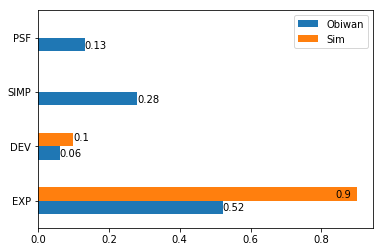

In [73]:
sim_bar = [len(sim[sim['n']==1])/len(sim),len(sim[sim['n']==4])/len(sim),0,0]
obiwan_bar = [len(sim[sim['type']=='EXP'])/len(sim),len(sim[sim['type']=='DEV'])/len(sim),\
             len(sim[sim['type']=='SIMP'])/len(sim),len(sim[sim['type']=='PSF'])/len(sim)]
import pandas as pd
index = ['EXP','DEV','SIMP','PSF']
df = pd.DataFrame({'Obiwan':obiwan_bar,'Sim':sim_bar},index=index)
ax = df.plot.barh()

value = np.round(obiwan_bar[0],decimals=2)
a1 = ax.annotate(value,(value,-0.19))

value = np.round(sim_bar[0],decimals=2)
a2 = ax.annotate(value,(value-0.06,0.05))

value = np.round(obiwan_bar[1],decimals=2)
a1 = ax.annotate(value,(value,0.8))

value = np.round(sim_bar[1],decimals=2)
a2 = ax.annotate(value,(value,1.1))

value = np.round(obiwan_bar[2],decimals=2)
a1 = ax.annotate(value,(value,1.8))

value = np.round(obiwan_bar[3],decimals=2)
a1 = ax.annotate(value,(value,2.8))

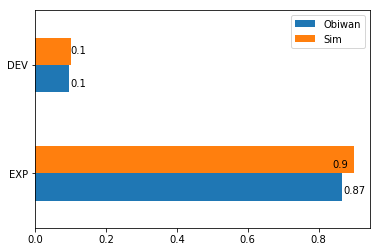

In [74]:
sim_bar = [len(sim[sim['n']==1])/len(sim),len(sim[sim['n']==4])/len(sim)]
obiwan_bar = [len(sim[(sim['n']==1)&sim['recovered']])/len(sim),len(sim[(sim['n']==4)&(sim['recovered'])])/len(sim)]
import pandas as pd
index = ['EXP','DEV']
df = pd.DataFrame({'Obiwan':obiwan_bar,'Sim':sim_bar},index=index)
ax = df.plot.barh()

value = np.round(obiwan_bar[0],decimals=2)
a1 = ax.annotate(value,(value,-0.19))

value = np.round(sim_bar[0],decimals=2)
a2 = ax.annotate(value,(value-0.06,0.05))

value = np.round(obiwan_bar[1],decimals=2)
a1 = ax.annotate(value,(value,0.8))

value = np.round(sim_bar[1],decimals=2)
a2 = ax.annotate(value,(value,1.1))

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:61

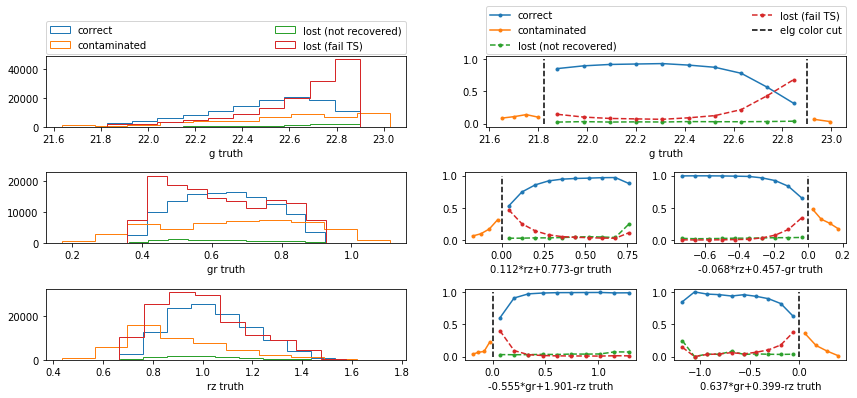

In [75]:
'''
Q:how's fracin affect elg selection? from the data, elgs are all over fracin=0.25
'''
plt.figure(figsize = (12,5))
plt.subplot(3,2,1)
g_truth = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g_2'])
r_truth = 22.5 - 2.5 * np.log10(sim['rflux'] / sim['mw_transmission_r_2'])
z_truth = 22.5 - 2.5 * np.log10(sim['zflux'] / sim['mw_transmission_z_2'])
gr_truth = g_truth - r_truth
rz_truth = r_truth - z_truth
elg_truth = (g_truth>21.825)&(g_truth<22.9)  &(-0.068*rz_truth+0.457<gr_truth)&(gr_truth< 0.112*rz_truth+0.773) &(0.637*gr_truth+0.399<rz_truth)&(rz_truth<-0.555*gr_truth+1.901) 
elg_measured = sim['is_elg']
fracin = (sim['fracin_g']>0.2)&(sim['fracin_r']>0.2)&(sim['fracin_z']>0.2)

g_correct = g_truth[elg_truth&elg_measured]
g_contaminate = g_truth[(~elg_truth)&elg_measured]
g_lost = g_truth[(~sim['recovered'])&elg_truth]
g_lost_TS_fail = g_truth[elg_truth&(~elg_measured)]
g_lost_fracin = g_truth[elg_truth&(~fracin)]
p1=plt.hist(g_correct,histtype='step',label = 'correct')
p2=plt.hist(g_contaminate,histtype='step',label = 'contaminated')
p3=plt.hist(g_lost,histtype='step',label = 'lost (not recovered)')
p4=plt.hist(g_lost_TS_fail,histtype='step',label = 'lost (fail TS)')
#p5 = plt.hist(g_lost_fracin,histtype='step',label = 'lost (frac_in)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('g truth')

plt.subplot(3,2,3)
gr_correct = gr_truth[elg_truth&elg_measured]
gr_contaminate = gr_truth[(~elg_truth)&elg_measured]
gr_lost = gr_truth[(~sim['recovered'])&elg_truth]
gr_lost_TS_fail = gr_truth[elg_truth&(~elg_measured)]
gr_lost_fracin = gr_truth[elg_truth&(~fracin)]

p1=plt.hist(gr_correct,histtype='step',label = 'correct')
p2=plt.hist(gr_contaminate,histtype='step',label = 'contaminated')
p3=plt.hist(gr_lost,histtype='step',label = 'lost (not recovered)')
p4=plt.hist(gr_lost_TS_fail,histtype='step',label = 'lost (fail TS)')
#p5 = plt.hist(gr_lost_fracin,histtype='step',label = 'lost (frac_in)')
plt.xlabel('gr truth')


plt.subplot(3,2,5)
rz_correct = rz_truth[elg_truth&elg_measured]
rz_contaminate = rz_truth[(~elg_truth)&elg_measured]
rz_lost = rz_truth[(~sim['recovered'])&elg_truth]
rz_lost_TS_fail = rz_truth[elg_truth&(~elg_measured)]
rz_lost_fracin = rz_truth[elg_truth&(~fracin)]

p1=plt.hist(rz_correct,histtype='step',label = 'correct')
p2=plt.hist(rz_contaminate,histtype='step',label = 'contaminated')
p3=plt.hist(rz_lost,histtype='step',label = 'lost (not recovered)')
p4=plt.hist(rz_lost_TS_fail,histtype='step',label = 'lost (fail TS)')
#p5 = plt.hist(rz_lost_fracin,histtype='step',label = 'lost (frac_in)')
plt.xlabel('rz truth')

plt.subplot(3,2,2)
g_measured = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g_2'])
r_measured = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r_2'])
z_measured = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z_2'])
gr_measured = g_measured-r_measured
rz_measured = r_measured-z_measured
g_measured_elg = (g_measured>21.825)&(g_measured<22.9)
g_truth_elg = (g_truth>21.825)&(g_truth<22.9)
bins=10
#sec #1
minium = 21.825
maximun = 22.9
interval = (maximun-minium)/bins
g_truth_ratio_x = []
g_truth_ratio_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))&g_truth_elg
    sel_2 = sel_1&g_measured_elg
    g_truth_ratio_y.append(sel_2.sum()/sel_1.sum())
    g_truth_ratio_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_ratio_x,g_truth_ratio_y,marker = '.',color = '#1f77b4',label = 'correct')
max_ratio = np.array(g_truth_ratio_y).max()

#sec 2.1
minium = g_truth.min()
maximun = 21.825
bins=4
interval = (maximun-minium)/bins
g_truth_contaminate_x = []
g_truth_contaminate_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))
    sel_2 = sel_1&(sim['is_elg'])
    g_truth_contaminate_y.append(sel_2.sum()/sel_1.sum())
    g_truth_contaminate_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_contaminate_x,g_truth_contaminate_y,marker = '.',color = '#ff7f0e',label = 'contaminated')

max_ratio = max(max_ratio,np.array(g_truth_contaminate_y).max())

#sec 2.2
minium = 22.9
maximun = g_truth.max()
bins=2
interval = (maximun-minium)/bins
g_truth_contaminate2_x = []
g_truth_contaminate2_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))
    sel_2 = sel_1&(sim['is_elg'])
    g_truth_contaminate2_y.append(sel_2.sum()/sel_1.sum())
    g_truth_contaminate2_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_contaminate2_x,g_truth_contaminate2_y,marker = '.',color = '#ff7f0e')

max_ratio = max(max_ratio,np.array(g_truth_contaminate2_y).max())

#sec #3
minium = 21.825
maximun = 22.9
bins=10
interval = (maximun-minium)/bins
g_truth_unrecover_x = []
g_truth_unrecover_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))&g_truth_elg
    sel_2 = sel_1&(~sim['recovered'])
    g_truth_unrecover_y.append(sel_2.sum()/sel_1.sum())
    g_truth_unrecover_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_unrecover_x,g_truth_unrecover_y,marker = '.',linestyle = '--',color = '#2ca02c'\
         ,label = 'lost (not recovered)')
max_ratio=max(max_ratio,np.array(g_truth_unrecover_y).max())

#sec #4
minium = 21.825
maximun = 22.9
bins=10
interval = (maximun-minium)/bins
g_truth_TS_x = []
g_truth_TS_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))&g_truth_elg
    sel_2 = sel_1&(~g_measured_elg)
    g_truth_TS_y.append(sel_2.sum()/sel_1.sum())
    g_truth_TS_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_TS_x,g_truth_TS_y,marker = '.',linestyle = '--',color = '#d62728'\
         ,label = 'lost (fail TS)')
#max_ratio
max_ratio = max(max_ratio,np.array(g_truth_TS_y).max())



plt.xlabel('g truth')
#plt.ylabel('ratio')

#max_ratio
plt.plot([21.825]*2,[0,1],'k--',label = 'elg color cut')
plt.plot([22.9]*2,[0,1],'k--')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)




def plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle):
    interval = (maximun-minium)/bins
    truth_ratio_x = []
    truth_ratio_y = []
    for i in range(bins):
        sel_1 = (truth>minium+interval*i)&(truth<minium+interval*(i+1))&truth_elg
        sel_2 = sel_1&measured_elg
        truth_ratio_y.append(sel_2.sum()/sel_1.sum())
        truth_ratio_x.append(minium+interval*(i+0.5))
    plt.plot(truth_ratio_x,truth_ratio_y,marker = '.',color = color,label = 'correct',linestyle=linestyle)
    max_ratio = np.array(g_truth_ratio_y).max()


plt.subplot(3,4,7)
'( 0.112*rz_truth+0.773-gr_truth>0) '
measured = np.array(0.112*rz_measured+0.773-gr_measured)
truth = np.array(0.112*rz_truth+0.773-gr_truth)
measured_elg = (measured>0)
truth_elg = (truth>0)
bins=10
#sec #1
minium = 0
maximun = max(truth.max(),measured.max())
color = '#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
measured = np.array(0.112*rz_measured+0.773-gr_measured)
truth = np.array(0.112*rz_truth+0.773-gr_truth)
measured_elg = (measured>0)
truth_non_elg = (truth<0)
bins=4
minium = min(truth.min(),measured.min())
maximun = 0
color = '#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #3
measured = np.array(0.112*rz_measured+0.773-gr_measured)
truth = np.array(0.112*rz_truth+0.773-gr_truth)
not_recovered = (~sim['recovered'])
truth_elg = (truth>0)
bins=10
minium = 0
maximun = max(truth.max(),measured.max())
color = '#2ca02c'
label = 'lost (not recovered)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,not_recovered,color,label,linestyle)

#sec #4
measured = np.array(0.112*rz_measured+0.773-gr_measured)
truth = np.array(0.112*rz_truth+0.773-gr_truth)
measured_non_elg = (measured<0)
truth_elg = (truth>0)
bins=10
minium = 0
maximun = max(truth.max(),measured.max())
color = '#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')

plt.xlabel('0.112*rz+0.773-gr truth')

#########################################################################################################
plt.subplot(3,4,8)
'(-0.068*rz_truth+0.457-gr_truth<0)'

measured = np.array(-0.068*rz_measured+0.457-gr_measured)
truth = np.array(-0.068*rz_truth+0.457-gr_truth)
measured_elg = (measured<0)
truth_elg = (truth<0)
bins=10
truth_non_elg = (truth>0)
measured_non_elg = (measured>0)
#sec #1
minium = min(truth.min(),measured.min())
maximun = 0
color = '#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
bins=4
minium = 0
maximun = max(truth.max(),measured.max())
color = '#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #3
not_recovered = (~sim['recovered'])
bins=10
minium = min(truth.min(),measured.min())
maximun = 0
color = '#2ca02c'
label = 'lost (not recovered)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,not_recovered,color,label,linestyle)

#sec #4
bins=10
minium = min(truth.min(),measured.min())
maximun = 0
color = '#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')


plt.xlabel('-0.068*rz+0.457-gr truth')
#########################################################################################################
plt.subplot(3,4,11)
'(-0.555*gr_truth+1.901-rz_truth>0)'
measured = np.array(-0.555*gr_measured+1.901-rz_measured)
truth = np.array(-0.555*gr_truth+1.901-rz_truth)
measured_elg = (measured>0)
truth_elg = (truth>0)
bins=10
truth_non_elg = (truth<0)
measured_non_elg = (measured<0)
mmax=max(truth.max(),measured.max())
mmin=min(truth.min(),measured.min())
#sec #1
minium = 0
maximun = mmax
color = '#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
bins=4
minium = mmin
maximun = 0
color = '#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #3
not_recovered = (~sim['recovered'])
bins=10
minium = 0
maximun = mmax
color = '#2ca02c'
label = 'lost (not recovered)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,not_recovered,color,label,linestyle)

#sec #4
bins=10
minium = 0
maximun = mmax
color = '#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')
plt.xlabel('-0.555*gr+1.901-rz truth')

#########################################################################################################
plt.subplot(3,4,12)
'(0.637*gr_truth+0.399-rz_truth<0)'
measured = np.array(0.637*gr_measured+0.399-rz_measured)
truth = np.array(0.637*gr_truth+0.399-rz_truth)
measured_elg = (measured<0)
truth_elg = (truth<0)
bins=10
truth_non_elg = (truth>0)
measured_non_elg = (measured>0)
mmax=max(truth.max(),measured.max())
mmin=min(truth.min(),measured.min())
#sec #1
minium = mmin
maximun = 0
color = '#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
bins=4
minium = 0
maximun = mmax
color = '#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #3
not_recovered = (~sim['recovered'])
bins=10
minium = mmin
maximun = 0
color = '#2ca02c'
label = 'lost (not recovered)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,not_recovered,color,label,linestyle)

#sec #4
bins=10
minium = mmin
maximun = 0
color = '#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')
plt.xlabel('0.637*gr+0.399-rz truth')
plt.tight_layout()

In [76]:
#fig. 7 does not feel very informative, should I keep it..?
g_truth = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g_2'])
r_truth = 22.5 - 2.5 * np.log10(sim['rflux'] / sim['mw_transmission_r_2'])
z_truth = 22.5 - 2.5 * np.log10(sim['zflux'] / sim['mw_transmission_z_2'])
gr_truth = g_truth - r_truth
rz_truth = r_truth - z_truth
elg_truth = (g_truth>21.825)&(g_truth<22.9)&(-0.068*rz_truth+0.457<gr_truth)&(gr_truth< 0.112*rz_truth+0.773) &(0.637*gr_truth+0.399<rz_truth)&(rz_truth<-0.555*gr_truth+1.901) 
elg_measured = sim['is_elg']
fracin = (sim['fracin_g']>0.2)&(sim['fracin_r']>0.2)&(sim['fracin_z']>0.2)
g_measured = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g_2'])
r_measured = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r_2'])
z_measured = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z_2'])
gr_measured = g_measured-r_measured
rz_measured = r_measured-z_measured
g_measured_elg = (g_measured>21.825)&(g_measured<22.9)
g_truth_elg = (g_truth>21.825)&(g_truth<22.9)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:99: Run

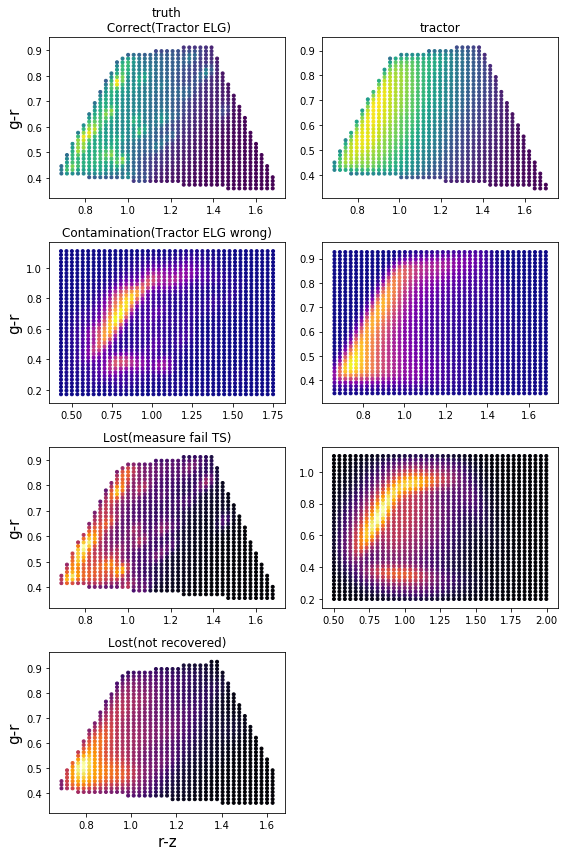

In [77]:
from scipy.stats import kde
import matplotlib.colors as colors
plt.clf()
plt.figure(figsize = (8,12))
plt.subplot(4,2,1)
nbins=40
plt.ylabel('g-r',fontsize=15)
plt.title('truth\n Correct(Tractor ELG)')
x_rz = rz_truth[elg_truth]
y_gr = gr_truth[elg_truth]
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi=zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
sel = (-0.068*xi_rz+0.457<yi_gr)&(yi_gr< 0.112*xi_rz+0.773) &(0.637*yi_gr+0.399<xi_rz)&(xi_rz<-0.555*yi_gr+1.901) 
plt.scatter(xi_rz[sel],yi_gr[sel],c = zi[sel],marker='.',cmap = cmaps[0])

plt.subplot(4,2,2)
plt.title('tractor')
nbins=40
sel = (-0.068*rz_measured+0.457<gr_measured)&(gr_measured< 0.112*rz_measured+0.773)&(0.637*gr_measured+0.399<rz_measured)&(rz_measured<-0.555*gr_measured+1.901) 
x_rz = rz_measured[(sim['is_elg'])&sel]
y_gr = gr_measured[sim['is_elg']&sel]
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi=zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
sel = (-0.068*xi_rz+0.457<yi_gr)&(yi_gr< 0.112*xi_rz+0.773) &(0.637*yi_gr+0.399<xi_rz)&(xi_rz<-0.555*yi_gr+1.901) 
plt.scatter(xi_rz[sel],yi_gr[sel],c = zi[sel],marker='.',cmap = cmaps[0])



plt.subplot(4,2,3)
plt.ylabel('g-r',fontsize=15)
plt.title('Contamination(Tractor ELG wrong)')

nbins=40
sel = (-0.068*rz_measured+0.457<gr_measured)&(gr_measured< 0.112*rz_measured+0.773)&(0.637*gr_measured+0.399<rz_measured)&(rz_measured<-0.555*gr_measured+1.901) 
x_rz = rz_truth[(~elg_truth)&sel&sim['is_elg']]
y_gr = gr_truth[(~elg_truth)&sel&sim['is_elg']]
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi=zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
plt.scatter(xi_rz,yi_gr,c = zi,marker='.',cmap = cmaps[1])

plt.subplot(4,2,4)

nbins=40
sel = (-0.068*rz_measured+0.457<gr_measured)&(gr_measured< 0.112*rz_measured+0.773)&(0.637*gr_measured+0.399<rz_measured)&(rz_measured<-0.555*gr_measured+1.901) 
x_rz = rz_measured[(~elg_truth)&sel&sim['is_elg']]
y_gr = gr_measured[(~elg_truth)&sel&sim['is_elg']]
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi=zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
plt.scatter(xi_rz,yi_gr,c = zi,marker='.',cmap = cmaps[1])



plt.subplot(4,2,5)
plt.ylabel('g-r',fontsize=15)
plt.title('Lost(measure fail TS)')
nbins=40
sel = (g_measured>20)&(r_measured>20)&(z_measured>18)&(g_measured<24)&(r_measured<24)&(z_measured<23)
x_rz = rz_truth[(elg_truth)&sel&(~sim['is_elg'])]
y_gr = gr_truth[(elg_truth)&sel&(~sim['is_elg'])]
x_rz_new = x_rz[(x_rz>0.5)&(x_rz<2.0)&(y_gr>0.2)&(y_gr<1.1)]
y_gr_new = y_gr[(y_gr>0.2)&(y_gr<1.1)&(x_rz>0.5)&(x_rz<2.0)]
x_rz = x_rz_new
y_gr = y_gr_new
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi = zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
sel = (-0.068*xi_rz+0.457<yi_gr)&(yi_gr< 0.112*xi_rz+0.773) &(0.637*yi_gr+0.399<xi_rz)&(xi_rz<-0.555*yi_gr+1.901) 
plt.scatter(xi_rz[sel],yi_gr[sel],c = zi[sel],marker='.',cmap = cmaps[2])

plt.subplot(4,2,6)
nbins=40
sel = (g_measured>20)&(r_measured>20)&(z_measured>18)&(g_measured<24)&(r_measured<24)&(z_measured<23)
x_rz = rz_measured[(elg_truth)&sel&(~(sim['is_elg']))]
y_gr = gr_measured[(elg_truth)&sel&(~(sim['is_elg']))]
x_rz_new = x_rz[(x_rz>0.5)&(x_rz<2.0)&(y_gr>0.2)&(y_gr<1.1)]
y_gr_new = y_gr[(y_gr>0.2)&(y_gr<1.1)&(x_rz>0.5)&(x_rz<2.0)]
x_rz = x_rz_new
y_gr = y_gr_new
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi = zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
plt.scatter(xi_rz,yi_gr,c = zi,marker='.',cmap = cmaps[2])


plt.subplot(4,2,7)
plt.title('Lost(not recovered)')
plt.ylabel('g-r',fontsize=15)
nbins=40
sel = (g_measured>20)&(r_measured>20)&(z_measured>18)&(g_measured<24)&(r_measured<24)&(z_measured<23)
x_rz = rz_truth[(elg_truth)&sel&(~(sim['recovered']))]
y_gr = gr_truth[(elg_truth)&sel&(~(sim['recovered']))]
x_rz_new = x_rz[(x_rz>0.5)&(x_rz<2.0)&(y_gr>0.2)&(y_gr<1.1)]
y_gr_new = y_gr[(y_gr>0.2)&(y_gr<1.1)&(x_rz>0.5)&(x_rz<2.0)]
x_rz = x_rz_new
y_gr = y_gr_new
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi = zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
sel = (-0.068*xi_rz+0.457<yi_gr)&(yi_gr< 0.112*xi_rz+0.773) &(0.637*yi_gr+0.399<xi_rz)&(xi_rz<-0.555*yi_gr+1.901) 
plt.scatter(xi_rz[sel],yi_gr[sel],c = zi[sel],marker='.',cmap = cmaps[2])
plt.xlabel('r-z',fontsize=15)

'''
plt.subplot(5,2,9)
plt.title('Lost(fracin)')
plt.xlabel('r-z')
plt.ylabel('g-r')
nbins=40
sel = (g_measured>20)&(r_measured>20)&(z_measured>18)&(g_measured<24)&(r_measured<24)&(z_measured<23)
x_rz = rz_truth[(elg_truth)&sel&(~((sim['fracin_g']>0.2)&(sim['fracin_r']>0.2)&(sim['fracin_z']>0.2)))]
y_gr = gr_truth[(elg_truth)&sel&(~((sim['fracin_g']>0.2)&(sim['fracin_r']>0.2)&(sim['fracin_z']>0.2)))]
x_rz_new = x_rz[(x_rz>0.5)&(x_rz<2.0)&(y_gr>0.2)&(y_gr<1.1)]
y_gr_new = y_gr[(y_gr>0.2)&(y_gr<1.1)&(x_rz>0.5)&(x_rz<2.0)]
x_rz = x_rz_new
y_gr = y_gr_new
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi = zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
sel = (-0.068*xi_rz+0.457<yi_gr)&(yi_gr< 0.112*xi_rz+0.773) &(0.637*yi_gr+0.399<xi_rz)&(xi_rz<-0.555*yi_gr+1.901) 
plt.scatter(xi_rz[sel],yi_gr[sel],c = zi[sel],marker='.',cmap = cmaps[2])

plt.subplot(5,2,10)
plt.xlabel('r-z')
nbins=40
sel = (g_measured>20)&(r_measured>20)&(z_measured>18)&(g_measured<24)&(r_measured<24)&(z_measured<23)
x_rz = rz_measured[sim['recovered']&(elg_truth)&sel&(~((sim['fracin_g']>0.2)&(sim['fracin_r']>0.2)&(sim['fracin_z']>0.2)))]
y_gr = gr_measured[sim['recovered']&(elg_truth)&sel&(~((sim['fracin_g']>0.2)&(sim['fracin_r']>0.2)&(sim['fracin_z']>0.2)))]
x_rz_new = x_rz[(x_rz>0.5)&(x_rz<2.0)&(y_gr>0.2)&(y_gr<1.1)]
y_gr_new = y_gr[(y_gr>0.2)&(y_gr<1.1)&(x_rz>0.5)&(x_rz<2.0)]
x_rz = x_rz_new
y_gr = y_gr_new
k = kde.gaussian_kde(np.array([x_rz,y_gr]))
xi_rz, yi_gr = np.mgrid[x_rz.min():x_rz.max():nbins*1j, y_gr.min():y_gr.max():nbins*1j]
zi = k(np.vstack([xi_rz.flatten(), yi_gr.flatten()]))
zi = zi.reshape(xi_rz.shape)
zi = zi.flatten()
xi_rz = xi_rz.flatten()
yi_gr = yi_gr.flatten()
sel = (-0.068*xi_rz+0.457<yi_gr)&(yi_gr< 0.112*xi_rz+0.773) &(0.637*yi_gr+0.399<xi_rz)&(xi_rz<-0.555*yi_gr+1.901) 
plt.scatter(xi_rz,yi_gr,c = zi,marker='.',cmap = cmaps[2])

'''
plt.tight_layout()

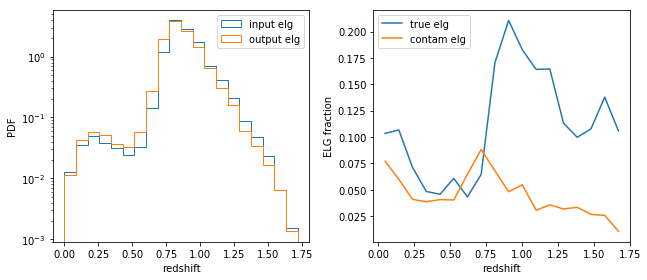

In [78]:
plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
p1 = plt.hist(sim[elg_truth]['redshift'],histtype = 'step',density=True,bins=20,label = 'input elg')
p2 = plt.hist(sim[(sim['recovered'])&(sim['is_elg'])]['redshift'],histtype = 'step',density=True,bins=20,label='output elg')
plt.gca().set_yscale('log')
plt.xlabel('redshift')
plt.ylabel('PDF')
plt.legend()

plt.subplot(1,2,2)
elg_correct = sim[(sim['recovered'])&(sim['is_elg'])&elg_truth]['redshift']
elg_contaminate = sim[(~elg_truth)&(sim['recovered'])&sim['is_elg']]['redshift']
minimun = min(elg_correct.min(),elg_contaminate.min())
maximum = max(elg_correct.max(),elg_contaminate.max())
bins = 18
interval = (maximum-minimun)/bins
frac_correct=[]
frac_bad = []
x=[]
for i in range(bins):
    left = minimun+i*interval
    right = minimun+(i+1)*interval
    mid = minimun+(i+0.5)*interval

    n_correct = len(elg_correct[(elg_correct>left)&(elg_correct<=right)])
    n_contaminate = len(elg_contaminate[(elg_contaminate>left)&(elg_contaminate<=right)])
    ALL = len(sim[sim['recovered']&(sim['redshift']>left)&(sim['redshift']<=right)])
    frac_correct.append(n_correct/ALL)
    frac_bad.append(n_contaminate/ALL)
    x.append(mid)
plt.plot(x,frac_correct,label='true elg')
plt.plot(x,frac_bad,label='contam elg')
plt.legend(loc='upper left')
plt.xlabel('redshift')
plt.ylabel('ELG fraction')
#plt.gca().set_yscale('log')


plt.tight_layout()

In [813]:
#for correlation function, see wonderful_plots.ipynb

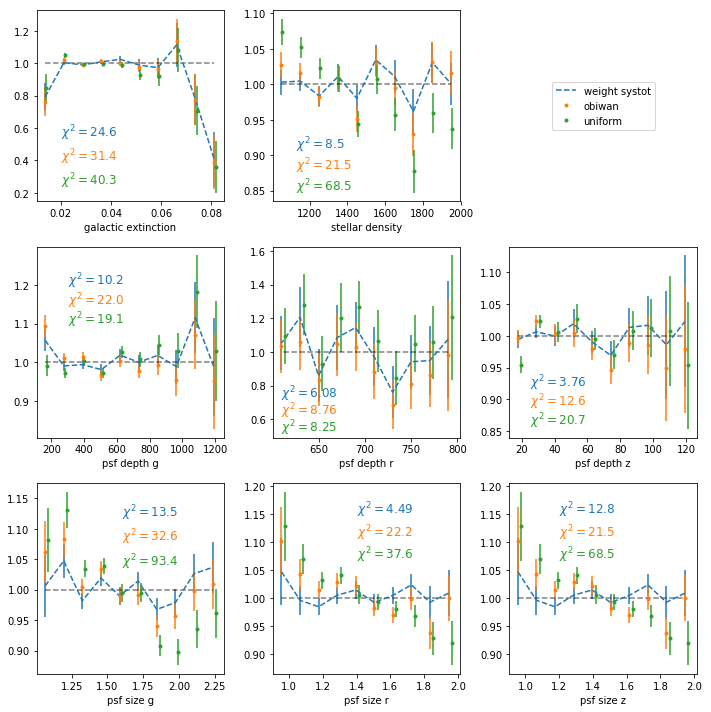

In [79]:
#sys
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/obiwan_analysis/sys-analysis/data/'
obiwan = topdir + 'hpebv_sys_obiwan_weight.dat'
uniform = topdir + 'hpebv_sys_uniform.dat'
weight_systot = topdir + 'hpebv_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
plt.errorbar(uniform_dat[0]+0.0005,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')
plt.xlabel('galactic extinction')
plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(0.02, 0.55, r'$\chi^2 = 24.6$', fontsize=12, color = '#1f77b4')
plt.text(0.02, 0.40, r'$\chi^2 = 31.4$', fontsize=12, color = '#ff7f0e')
plt.text(0.02, 0.25, r'$\chi^2 = 40.3$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,2)
obiwan = topdir + 'hpstardens_sys_obiwan_weight.dat'
uniform = topdir + 'hpstardens_sys_uniform.dat'
weight_systot = topdir + 'hpstardens_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
plt.errorbar(uniform_dat[0]+4,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')

plt.xlabel('stellar density')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1125, 0.91, r'$\chi^2 = 8.5$', fontsize=12, color = '#1f77b4')
plt.text(1125, 0.88, r'$\chi^2 = 21.5$', fontsize=12, color = '#ff7f0e')
plt.text(1125, 0.85, r'$\chi^2 = 68.5$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,4)
obiwan = topdir + 'hppsfdepth_g_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfdepth_g_sys_uniform.dat'
weight_systot = topdir + 'hppsfdepth_g_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
plt.errorbar(uniform_dat[0]+10,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')

plt.xlabel('psf depth g')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(300, 1.2, r'$\chi^2 = 10.2$', fontsize=12, color = '#1f77b4')
plt.text(300, 1.15, r'$\chi^2 = 22.0$', fontsize=12, color = '#ff7f0e')
plt.text(300, 1.1, r'$\chi^2 = 19.1$', fontsize=12, color = '#2ca02c')


plt.subplot(3,3,5)
obiwan = topdir + 'hppsfdepth_r_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfdepth_r_sys_uniform.dat'
weight_systot = topdir + 'hppsfdepth_r_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
plt.errorbar(uniform_dat[0]+4,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')

plt.xlabel('psf depth r')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(610, 0.73, r'$\chi^2 = 6.08$', fontsize=12, color = '#1f77b4')
plt.text(610, 0.63, r'$\chi^2 = 8.76$', fontsize=12, color = '#ff7f0e')
plt.text(610, 0.53, r'$\chi^2 = 8.25$', fontsize=12, color = '#2ca02c')


plt.subplot(3,3,6)
obiwan = topdir + 'hppsfdepth_z_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfdepth_z_sys_uniform.dat'
weight_systot = topdir + 'hppsfdepth_z_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
plt.errorbar(uniform_dat[0]+2,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')
plt.xlabel('psf depth z')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(25, 0.92, r'$\chi^2 = 3.76$', fontsize=12, color = '#1f77b4')
plt.text(25, 0.89, r'$\chi^2 = 12.6$', fontsize=12, color = '#ff7f0e')
plt.text(25, 0.86, r'$\chi^2 = 20.7$', fontsize=12, color = '#2ca02c')


plt.subplot(3,3,7)
obiwan = topdir + 'hppsfsize_g_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfsize_g_sys_uniform.dat'
weight_systot = topdir + 'hppsfsize_g_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
plt.errorbar(uniform_dat[0]+0.02,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')

plt.xlabel('psf size g')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1.6, 1.12, r'$\chi^2 = 13.5$', fontsize=12, color = '#1f77b4')
plt.text(1.6, 1.08, r'$\chi^2 = 32.6$', fontsize=12, color = '#ff7f0e')
plt.text(1.6, 1.04, r'$\chi^2 = 93.4$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,8)
obiwan = topdir + 'hppsfsize_r_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfsize_r_sys_uniform.dat'
weight_systot = topdir + 'hppsfsize_r_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
line1,_,_ = plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
line2,_,_ = plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
line3,_,_ = plt.errorbar(uniform_dat[0]+0.02,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')

plt.xlabel('psf size r')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1.4, 1.15, r'$\chi^2 = 4.49$', fontsize=12, color = '#1f77b4')
plt.text(1.4, 1.11, r'$\chi^2 = 22.2$', fontsize=12, color = '#ff7f0e')
plt.text(1.4, 1.07, r'$\chi^2 = 37.6$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,9)
obiwan = topdir + 'hppsfsize_r_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfsize_r_sys_uniform.dat'
weight_systot = topdir + 'hppsfsize_r_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
line1,_,_ = plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
line2,_,_ = plt.errorbar(obiwan_dat[0],obiwan_dat[1],obiwan_dat[2],label = 'obiwan',linestyle='none',marker='.')
line3,_,_ = plt.errorbar(uniform_dat[0]+0.02,uniform_dat[1],uniform_dat[2],label = 'uniform',linestyle='none',marker='.')

plt.xlabel('psf size z')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1.2, 1.15, r'$\chi^2 = 12.8$', fontsize=12, color = '#1f77b4')
plt.text(1.2, 1.11, r'$\chi^2 = 21.5$', fontsize=12, color = '#ff7f0e')
plt.text(1.2, 1.07, r'$\chi^2 = 68.5$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,3)
proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False),\
        plt.Rectangle((0,0),1,1,ec = '#2ca02c',fill=False)]
plt.legend((line1, line2, line3), ["weight systot","obiwan","uniform"],loc='center')
plt.gca().axis('off')

plt.tight_layout()

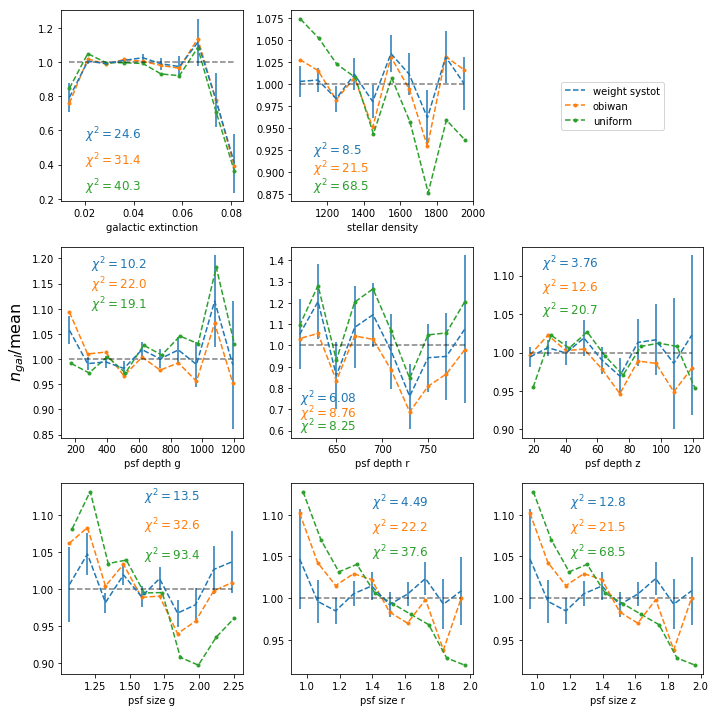

In [41]:
#sys
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/obiwan_analysis/sys-analysis/data/'
obiwan = topdir + 'hpebv_sys_obiwan_weight.dat'
uniform = topdir + 'hpebv_sys_uniform.dat'
weight_systot = topdir + 'hpebv_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0],uniform_dat[1],label = 'uniform',linestyle='--',marker='.')
plt.xlabel('galactic extinction')
plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(0.02, 0.55, r'$\chi^2 = 24.6$', fontsize=12, color = '#1f77b4')
plt.text(0.02, 0.40, r'$\chi^2 = 31.4$', fontsize=12, color = '#ff7f0e')
plt.text(0.02, 0.25, r'$\chi^2 = 40.3$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,2)
obiwan = topdir + 'hpstardens_sys_obiwan_weight.dat'
uniform = topdir + 'hpstardens_sys_uniform.dat'
weight_systot = topdir + 'hpstardens_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0]+4,uniform_dat[1],label = 'uniform',linestyle='--',marker='.')

plt.xlabel('stellar density')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1125, 0.92, r'$\chi^2 = 8.5$', fontsize=12, color = '#1f77b4')
plt.text(1125, 0.90, r'$\chi^2 = 21.5$', fontsize=12, color = '#ff7f0e')
plt.text(1125, 0.88, r'$\chi^2 = 68.5$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,4)
obiwan = topdir + 'hppsfdepth_g_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfdepth_g_sys_uniform.dat'
weight_systot = topdir + 'hppsfdepth_g_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0]+10,uniform_dat[1],label = 'uniform',linestyle='--',marker='.')
plt.ylabel(r'$n_{gal}$''/mean', fontsize=16)
plt.xlabel('psf depth g')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(300, 1.18, r'$\chi^2 = 10.2$', fontsize=12, color = '#1f77b4')
plt.text(300, 1.14, r'$\chi^2 = 22.0$', fontsize=12, color = '#ff7f0e')
plt.text(300, 1.1, r'$\chi^2 = 19.1$', fontsize=12, color = '#2ca02c')


plt.subplot(3,3,5)
obiwan = topdir + 'hppsfdepth_r_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfdepth_r_sys_uniform.dat'
weight_systot = topdir + 'hppsfdepth_r_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0],uniform_dat[1],label = 'uniform',linestyle='--',marker='.')

plt.xlabel('psf depth r')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(610, 0.73, r'$\chi^2 = 6.08$', fontsize=12, color = '#1f77b4')
plt.text(610, 0.66, r'$\chi^2 = 8.76$', fontsize=12, color = '#ff7f0e')
plt.text(610, 0.60, r'$\chi^2 = 8.25$', fontsize=12, color = '#2ca02c')


plt.subplot(3,3,6)
obiwan = topdir + 'hppsfdepth_z_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfdepth_z_sys_uniform.dat'
weight_systot = topdir + 'hppsfdepth_z_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0]+2,uniform_dat[1],label = 'uniform',linestyle='--',marker='.')
plt.xlabel('psf depth z')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(25, 1.11, r'$\chi^2 = 3.76$', fontsize=12, color = '#1f77b4')
plt.text(25, 1.08, r'$\chi^2 = 12.6$', fontsize=12, color = '#ff7f0e')
plt.text(25, 1.05, r'$\chi^2 = 20.7$', fontsize=12, color = '#2ca02c')


plt.subplot(3,3,7)
obiwan = topdir + 'hppsfsize_g_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfsize_g_sys_uniform.dat'
weight_systot = topdir + 'hppsfsize_g_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0]+0.02,uniform_dat[1],label = 'uniform',linestyle='--',marker='.')

plt.xlabel('psf size g')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1.6, 1.12, r'$\chi^2 = 13.5$', fontsize=12, color = '#1f77b4')
plt.text(1.6, 1.08, r'$\chi^2 = 32.6$', fontsize=12, color = '#ff7f0e')
plt.text(1.6, 1.04, r'$\chi^2 = 93.4$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,8)
obiwan = topdir + 'hppsfsize_r_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfsize_r_sys_uniform.dat'
weight_systot = topdir + 'hppsfsize_r_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
plt.plot(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
plt.plot(uniform_dat[0]+0.02,uniform_dat[1],label = 'uniform',linestyle='--',marker='.')

plt.xlabel('psf size r')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1.4, 1.11, r'$\chi^2 = 4.49$', fontsize=12, color = '#1f77b4')
plt.text(1.4, 1.08, r'$\chi^2 = 22.2$', fontsize=12, color = '#ff7f0e')
plt.text(1.4, 1.05, r'$\chi^2 = 37.6$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,9)
obiwan = topdir + 'hppsfsize_r_sys_obiwan_weight.dat'
uniform = topdir + 'hppsfsize_r_sys_uniform.dat'
weight_systot = topdir + 'hppsfsize_r_sys_weight_systot.dat'
obiwan_dat = np.loadtxt(obiwan).transpose()
uniform_dat = np.loadtxt(uniform).transpose()
weight_systot_dat = np.loadtxt(weight_systot).transpose()
line1,_,_ = plt.errorbar(weight_systot_dat[0],weight_systot_dat[1],weight_systot_dat[2],linestyle='--',label = 'weight systot')
line2,_,_ = plt.errorbar(obiwan_dat[0],obiwan_dat[1],label = 'obiwan',linestyle='--',marker='.')
line3,_,_ = plt.errorbar(uniform_dat[0]+0.02,uniform_dat[1],label = 'uniform',linestyle='--',marker='.')

plt.xlabel('psf size z')

plt.plot(weight_systot_dat[0],[1]*len(weight_systot_dat[0]),'k--',alpha=0.5)
plt.text(1.2, 1.11, r'$\chi^2 = 12.8$', fontsize=12, color = '#1f77b4')
plt.text(1.2, 1.08, r'$\chi^2 = 21.5$', fontsize=12, color = '#ff7f0e')
plt.text(1.2, 1.05, r'$\chi^2 = 68.5$', fontsize=12, color = '#2ca02c')

plt.subplot(3,3,3)
proxy = [plt.Rectangle((0,0),1,1,ec = '#1f77b4',fill=False), plt.Rectangle((0,0),1,1,ec = '#ff7f0e',fill=False),\
        plt.Rectangle((0,0),1,1,ec = '#2ca02c',fill=False)]
plt.legend((line1, line2, line3), ["weight systot","obiwan","uniform"],loc='center')
plt.gca().axis('off')

plt.tight_layout()

Normalized confusion matrix
[[ 0.55  0.04  0.13  0.27  0.01]
 [ 0.22  0.22  0.16  0.39  0.01]]


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide


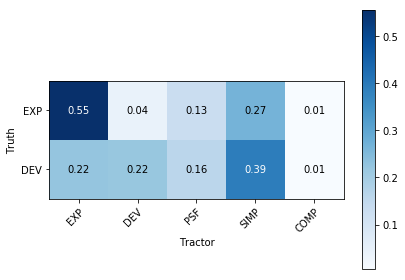

In [81]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = None

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #obiwan
    cm=cm[0:2]
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           #title=title,
           ylabel='Truth',
           xlabel='Tractor')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

y_true = np.zeros(len(sim))
y_true[sim['n']==1] = 0
y_true[sim['n']==4] = 1
y_pred = np.zeros(len(sim))
y_pred[sim['type']=='EXP']=0
y_pred[sim['type']=='DEV']=1
y_pred[sim['type']=='PSF']=2
y_pred[sim['type']=='SIMP']=3
y_pred[sim['type']=='COMP']=4
y_true = np.array(y_true,dtype = np.int)
y_pred = np.array(y_pred,dtype = np.int)
class_names = np.array(['EXP','DEV','PSF','SIMP','COMP'],dtype=np.str)
plot_confusion_matrix(y_true, y_pred, classes=class_names,normalize=True,
                      title=None)

In [3]:
#fig 16 comes from WCS error, not obiwan pixel error, should I keep it?


#fig 15: I can show that the bias mostly come from tractor underestimates 
#flux in model galaxies, mainly because it does not converge to the same 
#model when do the fitting. (chi2>0 even if I give it a model with no noise)

#fig 14:could also come from unsuccessful fitting of model? don't have a 
#good enough explanation on it


#fig 13: only the 3rd plot. showing true r_half does not affect recovery rate


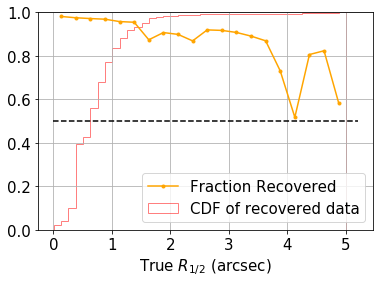

In [82]:
plt.clf()
matplotlib.rcParams.update({'font.size': 15})
rhalf_min = sim['rhalf'].min()
rhalf_max = sim['rhalf'].max()
bins = 20
interval = (rhalf_max-rhalf_min)/bins
frac = []
x=[]
plt.hist(sim[sim['recovered']]['rhalf'],density=True,color = 'red',\
         histtype = 'step',alpha=0.5,bins=40,cumulative=True,label = 'CDF of recovered data')
for i in range(20):
    left = rhalf_min+i*interval
    right = rhalf_min+(i+1)*interval
    mid = rhalf_min+(i+0.5)*interval
    n1 = len(sim[(sim['rhalf']>left)&(sim['rhalf']<right)])
    n2 = len(sim[(sim['rhalf']>left)&(sim['rhalf']<right)&(sim['recovered'])])
    frac.append(n2/n1)
    x.append(mid)

plt.plot(x,frac,color='orange',marker='.',label = 'Fraction Recovered')
plt.gca().set_ylim(0,1)
plt.plot([0,5.2],[0.5]*2,'k--')
plt.xlabel('True '+r'$R_{1/2}$ (arcsec)')
plt.grid()
plt.legend(loc = 'lower right')

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26

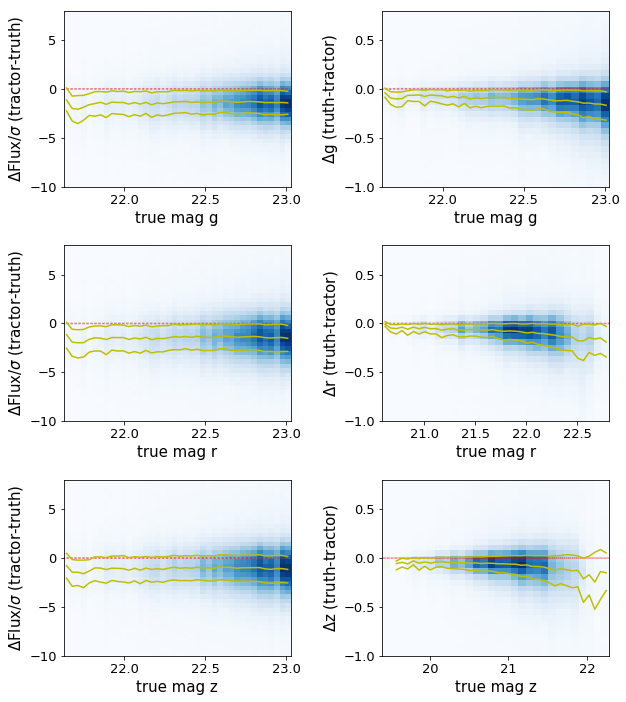

In [83]:
def get_percentile(y,x,bins,percen_num):#25,50,75
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list



g_truth = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g_1'])
r_truth = 22.5 - 2.5 * np.log10(sim['rflux'] / sim['mw_transmission_r_1'])
z_truth = 22.5 - 2.5 * np.log10(sim['zflux'] / sim['mw_transmission_z_1'])

g_measure = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g_2'])
r_measure = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r_2'])
z_measure = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z_2'])

def one_subplot_flux(f_type,mag_truth):
    flux_diff = (sim['flux_'+f_type]-sim[f_type+'flux'])*np.sqrt(sim['flux_ivar_'+f_type])
    y = flux_diff[(flux_diff>-10)&(flux_diff<8)]
    x = mag_truth[(flux_diff>-10)&(flux_diff<8)]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux/'+r'$\sigma$'+' (tractor-truth)')

matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('xtick', labelsize=13)
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(9,10))    
plt.subplot(3,2,1)    
one_subplot_flux('g',g_truth)
plt.subplot(3,2,3)    
one_subplot_flux('r',g_truth)
plt.subplot(3,2,5)    
one_subplot_flux('z',g_truth)
plt.tight_layout()



def one_subplot_mag(f_type,mag_truth,mag_measure):
    mag_diff = mag_truth - mag_measure
    y = mag_diff[(mag_diff>-1)&(mag_diff<0.8)]
    x = mag_truth[(mag_diff>-1)&(mag_diff<0.8)]
    h,xe,ye,i = plt.hist2d(x,y,bins=30,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+ f_type +' (truth-tractor)')

plt.subplot(3,2,2)    
one_subplot_mag('g',g_truth,g_measure)
plt.subplot(3,2,4)    
one_subplot_mag('r',r_truth,r_measure)
plt.subplot(3,2,6)    
one_subplot_mag('z',z_truth,z_measure)

plt.tight_layout()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26

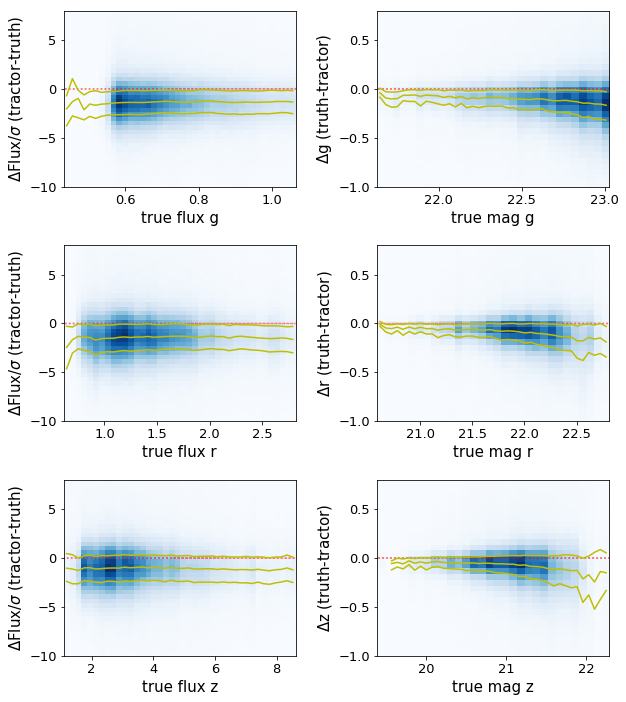

In [84]:
def get_percentile(y,x,bins,percen_num):#25,50,75
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list



g_truth = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g_1'])
r_truth = 22.5 - 2.5 * np.log10(sim['rflux'] / sim['mw_transmission_r_1'])
z_truth = 22.5 - 2.5 * np.log10(sim['zflux'] / sim['mw_transmission_z_1'])

g_measure = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g_2'])
r_measure = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r_2'])
z_measure = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z_2'])

def one_subplot_flux(f_type,mag_truth):
    flux_diff = (sim['flux_'+f_type]-sim[f_type+'flux'])*np.sqrt(sim['flux_ivar_'+f_type])
    sel=(sim[f_type+'flux']<sim[f_type+'flux'].max()/2.)
    y = flux_diff[(flux_diff>-10)&(flux_diff<8)&sel]
    x = sim[f_type+'flux'][(flux_diff>-10)&(flux_diff<8)&sel]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true flux '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux/'+r'$\sigma$'+' (tractor-truth)')

matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('xtick', labelsize=13)
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(9,10))    
plt.subplot(3,2,1)    
one_subplot_flux('g',g_truth)
plt.subplot(3,2,3)    
one_subplot_flux('r',g_truth)
plt.subplot(3,2,5)    
one_subplot_flux('z',g_truth)
plt.tight_layout()



def one_subplot_mag(f_type,mag_truth,mag_measure):
    mag_diff = mag_truth - mag_measure
    y = mag_diff[(mag_diff>-1)&(mag_diff<0.8)]
    x = mag_truth[(mag_diff>-1)&(mag_diff<0.8)]
    h,xe,ye,i = plt.hist2d(x,y,bins=30,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+ f_type +' (truth-tractor)')

plt.subplot(3,2,2)    
one_subplot_mag('g',g_truth,g_measure)
plt.subplot(3,2,4)    
one_subplot_mag('r',r_truth,r_measure)
plt.subplot(3,2,6)    
one_subplot_mag('z',z_truth,z_measure)

plt.tight_layout()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26

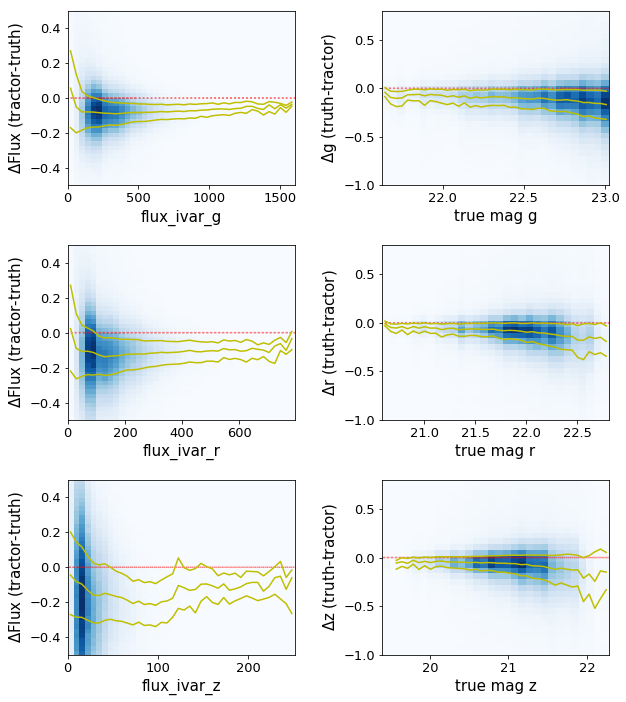

In [85]:
def get_percentile(y,x,bins,percen_num):#25,50,75
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list



g_truth = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g_1'])
r_truth = 22.5 - 2.5 * np.log10(sim['rflux'] / sim['mw_transmission_r_1'])
z_truth = 22.5 - 2.5 * np.log10(sim['zflux'] / sim['mw_transmission_z_1'])

g_measure = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g_2'])
r_measure = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r_2'])
z_measure = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z_2'])

def one_subplot_flux(f_type,mag_truth):
    flux_diff = (sim['flux_'+f_type]-sim[f_type+'flux'])#*np.sqrt(sim['flux_ivar_'+f_type])
    sel=(sim['flux_ivar_'+f_type]<sim['flux_ivar_'+f_type].max()/1.2)
    y = flux_diff[(flux_diff>-0.5)&(flux_diff<0.5)&sel]
    x = sim['flux_ivar_'+f_type][(flux_diff>-0.5)&(flux_diff<0.5)&sel]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('flux_ivar_'+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux'+' (tractor-truth)')

matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('xtick', labelsize=13)
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(9,10))    
plt.subplot(3,2,1)    
one_subplot_flux('g',g_truth)
plt.subplot(3,2,3)    
one_subplot_flux('r',g_truth)
plt.subplot(3,2,5)    
one_subplot_flux('z',g_truth)
plt.tight_layout()



def one_subplot_mag(f_type,mag_truth,mag_measure):
    mag_diff = mag_truth - mag_measure
    y = mag_diff[(mag_diff>-1)&(mag_diff<0.8)]
    x = mag_truth[(mag_diff>-1)&(mag_diff<0.8)]
    h,xe,ye,i = plt.hist2d(x,y,bins=30,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+ f_type +' (truth-tractor)')

plt.subplot(3,2,2)    
one_subplot_mag('g',g_truth,g_measure)
plt.subplot(3,2,4)    
one_subplot_mag('r',r_truth,r_measure)
plt.subplot(3,2,6)    
one_subplot_mag('z',z_truth,z_measure)

plt.tight_layout()

In [87]:
sel = (sim['gflux']- sim['flux_g']>-1)&(sim['gflux']- sim['flux_g']<1)
(sim[sel]['gflux'] - sim[sel]['flux_g']).mean()

0.075551702483907343

In [88]:
sel = (sim['rflux']- sim['flux_r']>-1)&(sim['rflux']- sim['flux_r']<2)
(sim[sel]['rflux'] - sim[sel]['flux_r']).mean()

0.13300829697471639

In [89]:
sel = (sim['zflux']- sim['flux_z']>-1)&(sim['zflux']- sim['flux_z']<1)
(sim[sel]['zflux'] - sim[sel]['flux_z']).mean()

0.19668142121765142

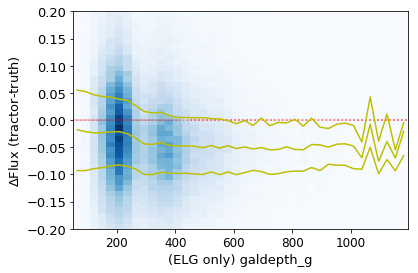

In [90]:
obiwan_w_z['flux_g']
obiwan_w_z['gflux']
obiwan_w_z['galdepth_g']

def one_subplot_flux(f_type):
    flux_diff = (obiwan_w_z['flux_'+f_type]-obiwan_w_z[f_type+'flux'])#*np.sqrt(sim['flux_ivar_'+f_type])
    #sel=(obiwan_w_z['flux_ivar_'+f_type]<sim['flux_ivar_'+f_type].max()/1.2)
    y = flux_diff[(flux_diff>-0.2)&(flux_diff<0.2)]
    x = obiwan_w_z['galdepth_'+f_type][(flux_diff>-0.2)&(flux_diff<0.2)]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('(ELG only) galdepth_'+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux'+' (tractor-truth)')
    
one_subplot_flux('g')

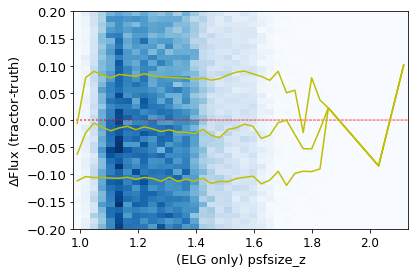

In [91]:
def one_subplot_flux(f_type):
    flux_diff = (obiwan_w_z['flux_'+f_type]-obiwan_w_z[f_type+'flux'])#*np.sqrt(sim['flux_ivar_'+f_type])
    #sel=(obiwan_w_z['flux_ivar_'+f_type]<sim['flux_ivar_'+f_type].max()/1.2)
    y = flux_diff[(flux_diff>-0.2)&(flux_diff<0.2)]
    x = obiwan_w_z['psfsize_'+f_type][(flux_diff>-0.2)&(flux_diff<0.2)]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('(ELG only) psfsize_'+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,75)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,25)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+'Flux'+' (tractor-truth)')
    
one_subplot_flux('z')

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14

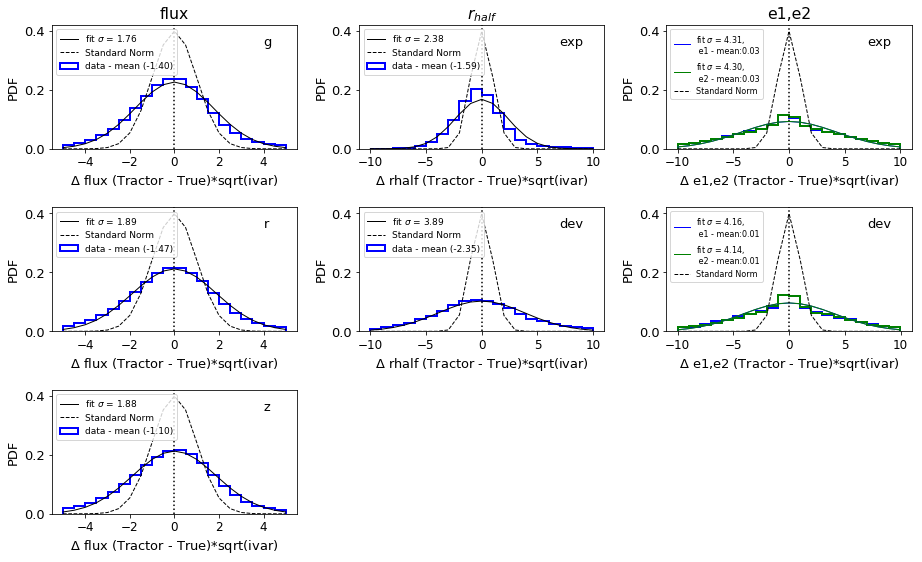

In [98]:
'''
mean is the mean of all pts between (-10,10), gaussian fitting is made between (-5,5) after mean correction
'''
matplotlib.rc('xtick', labelsize=12) 
plt.rcParams.update({'font.size': 13})
from scipy.stats import norm

g_truth = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g_1'])
r_truth = 22.5 - 2.5 * np.log10(sim['rflux'] / sim['mw_transmission_r_1'])
z_truth = 22.5 - 2.5 * np.log10(sim['zflux'] / sim['mw_transmission_z_1'])

g_measure = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g_2'])
r_measure = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r_2'])
z_measure = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z_2'])
plt.figure(figsize  = (13,8))  
def flux_plot(f_type):
    delta_flux = sim['flux_'+f_type] - sim[f_type+'flux']
    ivar = sim['flux_ivar_'+f_type]
    delta_flux_plt = delta_flux*np.sqrt(ivar)
    delta_flux_plt = delta_flux_plt[(delta_flux_plt>-10)&(delta_flux_plt<10)]
    mean = delta_flux_plt.mean()
    delta_flux_plt_c = delta_flux_plt - mean
    delta_flux_plt_c = delta_flux_plt_c[(delta_flux_plt_c>-5)&(delta_flux_plt_c<5)]
     
    (mu, sigma) = norm.fit(delta_flux_plt_c)     
    n, bins, patches = plt.hist(delta_flux_plt_c,bins=20,histtype = 'step',density = True, \
                            linewidth=2,color='b',label = 'data - mean (%.2f)'%(mean+mu))
    d = mlab.normpdf( bins, 0, sigma)
    l = plt.plot(bins, d, 'k-', linewidth=1,label = 'fit '+r'$\sigma$ = %.2f'%sigma)
    d = mlab.normpdf( bins, 0, 1)
    l = plt.plot(bins, d, 'k--', linewidth=1,label = 'Standard Norm')
    plt.plot([0]*2,[0,0.42],'k:')
    plt.gca().set_ylim((0,0.42))
    plt.text(4,0.35,f_type)
    plt.xlabel(r'$\Delta$ flux (Tractor - True)*sqrt(ivar)')
    plt.legend(loc = 'upper left', prop={'size': 9})
    plt.ylabel('PDF')
    
  
plt.subplot(3,3,1)
plt.title('flux')
flux_plot('g')
plt.subplot(3,3,4)
flux_plot('r')
plt.subplot(3,3,7)
flux_plot('z')
plt.tight_layout()

#SIMP is 0.5?
def r_half_plot(g_type):#exp,dev
    if g_type=='exp':
        n=1
    else:
        n=4
    sim_needed = sim[(sim['n']==n)&(sim['recovered'])&(sim['type']==g_type.upper())]
    ivar = sim_needed['shape'+g_type+'_r_ivar']
    delta_r = sim_needed['shape'+g_type+'_r']-sim_needed['rhalf']
    delta_r_plt = delta_r*np.sqrt(ivar)
    delta_r_plt = delta_r_plt[(delta_r_plt>-15)&(delta_r_plt<15)]
    mean = delta_r_plt.mean()
    delta_r_plt_c = delta_r_plt - mean
    delta_r_plt_c = delta_r_plt_c[(delta_r_plt_c>-10)&(delta_r_plt_c<10)]
     
    (mu, sigma) = norm.fit(delta_r_plt_c)     
    n, bins, patches = plt.hist(delta_r_plt_c,bins=20,histtype = 'step',density = True, \
                            linewidth=2,color='b',label = 'data - mean (%.2f)'%(mean+mu))
                         
    d = mlab.normpdf( bins, 0, sigma)
    l = plt.plot(bins, d, 'k-', linewidth=1,label = 'fit '+r'$\sigma$ = %.2f'%sigma)
    d = mlab.normpdf( bins, 0, 1)
    l = plt.plot(bins, d, 'k--', linewidth=1,label = 'Standard Norm')
    plt.plot([0]*2,[0,0.42],'k:')
    plt.gca().set_ylim((0,0.42))
    plt.text(7,0.35,g_type)
    plt.xlabel(r'$\Delta$ rhalf (Tractor - True)*sqrt(ivar)')
    plt.legend(loc = 'upper left', prop={'size': 9})
    plt.ylabel('PDF')
                         
plt.subplot(3,3,2)
r_half_plot('exp')
plt.title(r'$r_{half}$')
plt.subplot(3,3,5)
r_half_plot('dev')                         


                         
def e_plot(g_type):
    if g_type=='exp':
        n=1
    else:
        n=4
    sim_needed = sim[(sim['n']==n)&(sim['recovered'])&(sim['type']==g_type.upper())]
    ivar1 = sim_needed['shape'+g_type+'_e1_ivar']
    ivar2 = sim_needed['shape'+g_type+'_e2_ivar']
    delta_r1 = sim_needed['e1']
    delta_r2 = sim_needed['e2']
    delta_r_plt1 = delta_r1*np.sqrt(ivar1)
    delta_r_plt2 = delta_r2*np.sqrt(ivar2)
    delta_r_plt1 = delta_r_plt1[(delta_r_plt1>-15)&(delta_r_plt1<15)]
    delta_r_plt2 = delta_r_plt2[(delta_r_plt2>-15)&(delta_r_plt2<15)]
    mean1 = delta_r_plt1.mean()
    mean2 = delta_r_plt2.mean()
    delta_r_plt_c1 = delta_r_plt1 - mean1
    delta_r_plt_c2 = delta_r_plt2 - mean2
    delta_r_plt_c1 = delta_r_plt_c1[(delta_r_plt_c1>-10)&(delta_r_plt_c1<10)]
    delta_r_plt_c2 = delta_r_plt_c2[(delta_r_plt_c2>-10)&(delta_r_plt_c2<10)]
     
    (mu, sigma) = norm.fit(delta_r_plt_c1)     
    (mu2, sigma2) = norm.fit(delta_r_plt_c2)     
    n, bins, patches = plt.hist(delta_r_plt_c1,bins=20,histtype = 'step',density = True, \
                            linewidth=2,color='b')#,label = 'e1 data - mean (%.2f)'%(mean1+mu)
    n2, bins2, patches2 = plt.hist(delta_r_plt_c2,bins=20,histtype = 'step',density = True, \
                            linewidth=2,color='g')#,label = 'e2 data - mean (%.2f)'%(mean2+mu2)

                         
    d = mlab.normpdf( bins, 0, sigma)
    l = plt.plot(bins, d, 'b-', linewidth=1,label = 'fit '+r'$\sigma$'+' = %.2f,\n e1 - mean:%.2f'\
                 %(sigma,mean2+mu2))
    d2 = mlab.normpdf( bins2, 0, sigma2)
    l2 = plt.plot(bins2, d2, 'g-', linewidth=1,label = 'fit '+r'$\sigma$'+' = %.2f,\n e2 - mean:%.2f'\
                  %(sigma2,mean2+mu2))
    d = mlab.normpdf( bins, 0, 1)
    l = plt.plot(bins, d, 'k--', linewidth=1,label = 'Standard Norm')
    plt.plot([0]*2,[0,0.42],'k:')
    plt.gca().set_ylim((0,0.42))
    plt.text(7,0.35,g_type)
    plt.xlabel(r'$\Delta$ e1,e2 (Tractor - True)*sqrt(ivar)')
    plt.legend(loc = 'upper left', prop={'size': 8})
    plt.ylabel('PDF')
    
plt.subplot(3,3,3)
e_plot('exp')  
plt.title('e1,e2')
plt.subplot(3,3,6)
e_plot('dev')
plt.tight_layout()

In [ ]:
#find abnormal flux value ratio as a function of frac_in


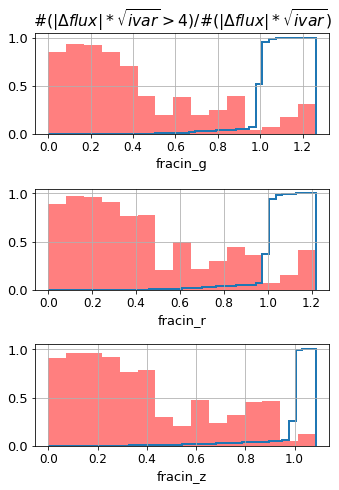

In [99]:
def flux_plot(f_type):
    delta_flux = sim['flux_'+f_type] - sim[f_type+'flux']
    ivar = sim['flux_ivar_'+f_type]
    delta_flux_plt = delta_flux*np.sqrt(ivar)
    median = np.percentile(delta_flux_plt,50)
    delta_flux_plt_c = delta_flux_plt - median
    y=[]
    minimum =  sim['fracin_'+f_type].min()
    maximum = sim['fracin_'+f_type].max()
    N = 15
    interval = (maximum-minimum)/N
    x=[]
    for i in range(N):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        med = minimum+(i+0.5)*interval
        sel = (sim['fracin_'+f_type]>left)&(sim['fracin_'+f_type]<=right)
        n = len(delta_flux_plt_c[sel&(np.abs(delta_flux_plt_c>4))])/len(delta_flux_plt_c[sel])
        x.append(med)
        y.append(n)

    return x,y,interval
plt.figure(figsize = (5,7))
plt.subplot(3,1,1)
x,y,interval = flux_plot('g')
plt.xlabel('fracin_g')
plt.title(r'$\# (|\Delta flux|*\sqrt{ivar}>4)/\# (|\Delta flux|*\sqrt{ivar})$')
plt.bar(x,y,width=interval,color = 'red', alpha = 0.5)
plt.hist(sim['fracin_g'],density = True, cumulative = True,\
         histtype = 'step',bins = 40,linewidth = 2)
plt.grid()

plt.subplot(3,1,2)
x,y,interval = flux_plot('r')
plt.xlabel('fracin_r')
#plt.ylabel('frac of '+r'|$\Delta$flux|*$\sqrt{ivar}$'+'>4')
plt.bar(x,y,width=interval,color = 'red', alpha = 0.5)
plt.hist(sim['fracin_r'],density = True, cumulative = True,histtype = 'step',bins = 40,linewidth = 2)
plt.grid()

plt.subplot(3,1,3)
x,y,interval = flux_plot('z')
plt.xlabel('fracin_z')
#plt.ylabel('frac of '+r'|$\Delta$flux|*$\sqrt{ivar}$'+'>4')
plt.bar(x,y,width=interval,color = 'red', alpha = 0.5)
plt.hist(sim['fracin_z'],density = True, cumulative = True,histtype = 'step',bins = 40,linewidth = 2)
plt.grid()

plt.tight_layout()

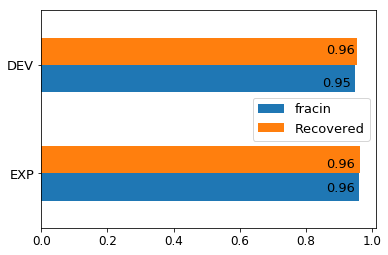

In [100]:
sim_bar = [len(sim[(sim['n']==1)&(sim['recovered'])])/len(sim[(sim['n']==1)]),\
           len(sim[(sim['n']==4)&(sim['recovered'])])/len(sim[(sim['n']==4)])]
fracin_sel = (sim['fracin_g']>0.5)&(sim['fracin_r']>0.5)&(sim['fracin_z']>0.5)
n1 = len(sim[(sim['n']==1)&(sim['recovered'])&fracin_sel])
n2 = len(sim[(sim['n']==1)])
n3 = len(sim[(sim['n']==4)&(sim['recovered'])&fracin_sel])
n4 = len(sim[(sim['n']==4)])
obiwan_bar = [n1/n2,n3/n4]
import pandas as pd
index = ['EXP','DEV']
df = pd.DataFrame({'fracin':[obiwan_bar[0],obiwan_bar[1]],'Recovered':[sim_bar[0],sim_bar[1]]},index=index)
ax = df.plot.barh()

value = np.round(obiwan_bar[0],decimals=2)
a1 = ax.annotate(value,(value-0.1,-0.17))

value = np.round(sim_bar[0],decimals=2)
a2 = ax.annotate(value,(value-0.1,0.05))

value = np.round(obiwan_bar[1],decimals=2)
a1 = ax.annotate(value,(value-0.1,0.8))

value = np.round(sim_bar[1],decimals=2)
a2 = ax.annotate(value,(value-0.1,1.1))

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


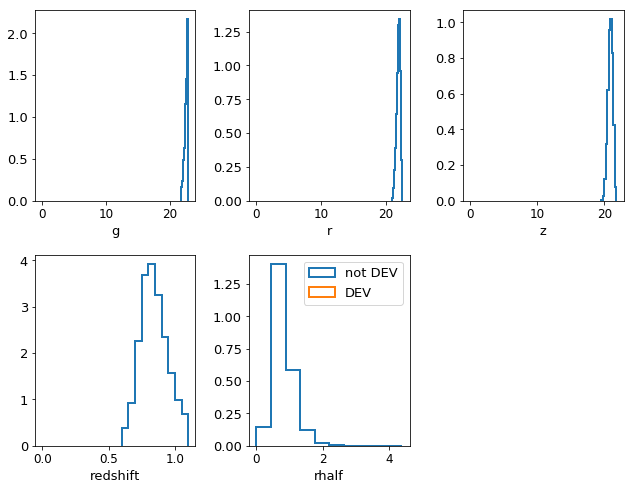

In [101]:
#Fig. 21: showing dev is brighter than exp, this is needed
#Fig. 22: I think it's the opposite...
#Fig. 17 show dev are systematically brighter than exp galaxies
g     = 22.5 - 2.5 * np.log10(final_tab['DECAM_FLUX'][:,1] / final_tab['DECAM_MW_TRANSMISSION'][:,1])
r_mag = 22.5 - 2.5 * np.log10(final_tab['DECAM_FLUX'][:,2] / final_tab['DECAM_MW_TRANSMISSION'][:,2])
z_mag = 22.5 - 2.5 * np.log10(final_tab['DECAM_FLUX'][:,4] / final_tab['DECAM_MW_TRANSMISSION'][:,4])

plt.figure(figsize = (9,7))
plt.subplot(2,3,1)
plt.hist(g[(final_tab['TYPE']!='DEV')],density = True,histtype = 'step',linewidth=2,label = 'not DEV')
plt.hist(g[(final_tab['TYPE']=='DEV')],density = True,histtype = 'step',linewidth=2, label = 'DEV')
plt.xlabel('g')

plt.subplot(2,3,2)
plt.hist(r_mag[(final_tab['TYPE']!='DEV')],density = True,histtype = 'step',linewidth=2,label = 'not DEV')
plt.hist(r_mag[(final_tab['TYPE']=='DEV')],density = True,histtype = 'step',linewidth=2, label = 'DEV')
plt.xlabel('r')

plt.subplot(2,3,3)
plt.hist(z_mag[(final_tab['TYPE']!='DEV')],density = True,histtype = 'step',linewidth=2,label = 'not DEV')
plt.hist(z_mag[(final_tab['TYPE']=='DEV')],density = True,histtype = 'step',linewidth=2, label = 'DEV')
plt.xlabel('z')

plt.subplot(2,3,4)
plt.hist(final_tab[(final_tab['TYPE']!='DEV')]['redshift'],density = True,histtype = 'step',linewidth=2,label = 'not DEV')
plt.hist(final_tab[(final_tab['TYPE']=='DEV')]['redshift'],density = True,histtype = 'step',linewidth=2, label = 'DEV')
plt.xlabel('redshift')
plt.subplot(2,3,5)
plt.hist(final_tab[(final_tab['TYPE']!='DEV')]['SHAPEEXP_R'],density = True,histtype = 'step',linewidth=2,label = 'not DEV')
plt.hist(final_tab[(final_tab['TYPE']=='DEV')]['SHAPEDEV_R'],density = True,histtype = 'step',linewidth=2, label = 'DEV')
plt.xlabel('rhalf')
plt.legend()
plt.tight_layout()

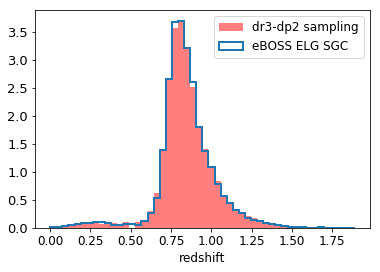

In [102]:
#compare grz,rhalf of dr3_deep2 sampling and elg_like dr3 galaxies@ sgc. 
#compare redshift distribution of dr3_deep2 sampling and eBOSS ELG SGC. 
#delete the rest of the plots

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
exp = 'eboss_elg_dr3deep2_EXP.csv'
import pandas
raw = pandas.read_csv(topdir+exp)
matplotlib.rcParams.update({'font.size': 12})
pred = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/test_randoms/randoms_seed_1_startid_2.fits')  
topdir_elg = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
elg = fits.getdata(topdir_elg+'eBOSS_ELG_full_ALL_v4.dat.fits')
elg = elg[(elg['chunk']=='eboss21')|(elg['chunk']=='eboss22')]
elg = elg[(elg['Z']>0)&(elg['Z']<=2)]
elg = elg[(elg['imatch']==1)]

_,bins,_=plt.hist(pred['nn_redshift'],bins=50,density=True,histtype='stepfilled',label='dr3-dp2 sampling'\
                 ,color = 'red',alpha=0.5)
p5 = plt.hist(elg['Z'],bins=bins,density=True,weights=elg['WEIGHT_CP']*elg['WEIGHT_NOZ'],\
              histtype='step',label='eBOSS ELG SGC',linewidth=2)
plt.xlabel('redshift')
plt.legend()

(array([   602.,   1010.,   1360.,   2727.,   3133.,   4085.,   5769.,
          8024.,   9967.,  13323.]),
 array([ 21.63,  21.77,  21.91,  22.05,  22.19,  22.33,  22.47,  22.61,
         22.75,  22.89,  23.02]),
 <a list of 10 Patch objects>)

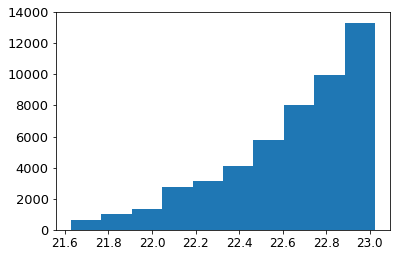

In [97]:
plt.hist(pred['g'])

In [178]:
#collect sweep files for r_half analysis
       
import glob
import os
from astropy.table import Table
from astropy.table import vstack

topdir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr3/sweep/3.1/'
filenames = glob.glob(topdir+'*')
chunk23_files = []
for filename in filenames:
    brickname1 = os.path.basename(filename)[6:13]
    brickname2 = os.path.basename(filename)[14:21]
    if (brickname1[3]=='p' and int(brickname1[:3])>305 and int(brickname1[:3])<360 and\
       int(brickname1[4:7])>=0 and int(brickname1[4:7])<=3) or \
        (brickname2[3]=='m' and int(brickname2[:3])>305 and int(brickname2[:3])<360 and\
       int(brickname2[4:7])>0 and int(brickname2[4:7])<=3):
        chunk23_files.append(filename)

sweep_dat = None        
for filename in chunk23_files:
    dat = Table.read(filename)
    if sweep_dat is None:
        sweep_dat = dat
    else:
        sweep_dat = vstack((sweep_dat,dat))

   
def ELG_selection_for_dr3_like(tractor,region='sgc'):
    import numpy as n
    value_g=tractor['DECAM_DEPTH'][:,1]
    value_r=tractor['DECAM_DEPTH'][:,2]
    value_z=tractor['DECAM_DEPTH'][:,4]
    gL = 62.79716079 
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75  
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)
    
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,1] / tractor['DECAM_MW_TRANSMISSION'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,2] / tractor['DECAM_MW_TRANSMISSION'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,4] / tractor['DECAM_MW_TRANSMISSION'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.625)&(g<23.025)&(-0.068*rz+0.257<gr)&(gr< 0.112*rz+0.973) &(0.218*gr+0.371<rz)&(rz<-0.555*gr+2.101)
    color_ngc = (g>21.625)&(g<23.1)  &(-0.068*rz+0.257<gr)&(gr< 0.112*rz+0.973) &(0.637*gr+0.199<rz)&(rz<-0.555*gr+2.101)
    # final selection boolean array :
    selection_sgc =(color_sgc)&(depth_selection_sgc)
    selection_ngc =(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])   


#output.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sgc_elg_like.fits',overwrite = True)
flag,output = ELG_selection_for_dr3_like(sweep_dat,'sgc')
output = output[output['DEC']<2]
output.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sgc_elg_like.fits',overwrite = True)



/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:41

In [152]:
#collect sweep files for r_half analysis
import glob
import os
from astropy.table import Table
from astropy.table import vstack

topdir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr3/sweep/3.1/'
filenames = glob.glob(topdir+'*')
chunk23_files = []
for filename in filenames:
    brickname1 = os.path.basename(filename)[6:13]
    brickname2 = os.path.basename(filename)[14:21]
    if (brickname1[3]=='p' and int(brickname1[:3])>120 and int(brickname1[:3])<160 and\
       int(brickname1[4:7])>13 and int(brickname1[4:7])<30) or \
        (brickname2[3]=='p' and int(brickname2[:3])>120 and int(brickname2[:3])<160 and\
       int(brickname2[4:7])>13 and int(brickname2[4:7])<30):
        chunk23_files.append(filename)

sweep_dat = None        
for filename in chunk23_files:
    dat = Table.read(filename)
    if sweep_dat is None:
        sweep_dat = dat
    else:
        sweep_dat = vstack((sweep_dat,dat))


def ELG_selection_for_dr3_like(tractor,region='ngc'):
    import numpy as n
    value_g=tractor['DECAM_DEPTH'][:,1]
    value_r=tractor['DECAM_DEPTH'][:,2]
    value_z=tractor['DECAM_DEPTH'][:,4]
    gL = 62.79716079 
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75  
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)
    
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,1] / tractor['DECAM_MW_TRANSMISSION'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,2] / tractor['DECAM_MW_TRANSMISSION'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,4] / tractor['DECAM_MW_TRANSMISSION'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.625)&(g<23.025)&(-0.068*rz+0.257<gr)&(gr< 0.112*rz+0.973) &(0.218*gr+0.371<rz)&(rz<-0.555*gr+2.101)
    color_ngc = (g>21.625)&(g<23.1)  &(-0.068*rz+0.257<gr)&(gr< 0.112*rz+0.973) &(0.637*gr+0.199<rz)&(rz<-0.555*gr+2.101)
    # final selection boolean array :
    selection_sgc =(color_sgc)&(depth_selection_sgc)
    selection_ngc =(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])   


#output.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sgc_elg_like.fits',overwrite = True)
flag,output = ELG_selection_for_dr3_like(sweep_dat,'ngc')
#output = output[output['DEC']<2]
output.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/ngc_elg_like.fits',overwrite = True)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:40

In [172]:
#flag,output = ELG_selection_for_dr3_like(sweep_dat,'sgc')
output_sgc = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sgc_elg_like.fits')
output = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/ngc_elg_like.fits')
#flag,output = ELG_selection_for_dr3(output)
output = output[output['RA']>13.5]

g  = 22.5 - 2.5 * np.log10(output['DECAM_FLUX'][:,1] / output['DECAM_MW_TRANSMISSION'][:,1])
r_mag = 22.5 - 2.5 * np.log10(output['DECAM_FLUX'][:,2] / output['DECAM_MW_TRANSMISSION'][:,2])
z_mag = 22.5 - 2.5 * np.log10(output['DECAM_FLUX'][:,4] / output['DECAM_MW_TRANSMISSION'][:,4])

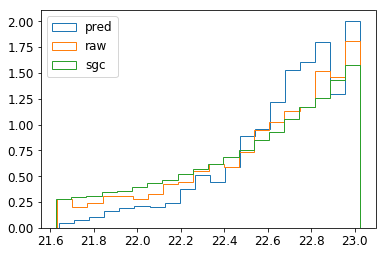

In [184]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
exp = 'eboss_vvds_exp.csv'
raw = pandas.read_csv(topdir+exp)

pred = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/test_randoms/randoms_seed_1_startid_3.fits') 

kwargs = {"density":True,"histtype":'step','bins':20}
g_sgc = 22.5 - 2.5 * np.log10(output_sgc['DECAM_FLUX'][:,1] / output_sgc['DECAM_MW_TRANSMISSION'][:,1])
p1=plt.hist(pred['g'],**kwargs,label = 'pred')
#p2=plt.hist(g,**kwargs,label = 'ngc')

p3=plt.hist(raw['g'],**kwargs,label = 'raw')
p4 = plt.hist(g_sgc,**kwargs,label = 'sgc')
plt.legend(loc = 'upper left')

In [185]:
g = pred['g']
gr = pred['g']-pred['r']
rz = pred['r']-pred['z']
color_sgc_pred = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
print(len(pred[color_sgc_pred])/len(pred))



0.36768


(array([    79.,    223.,    403.,    377.,    309.,    218.,    314.,
          1539.,   7700.,  14718.,  11031.,   6064.,   3271.,   1798.,
           897.,    488.,    312.,    162.,     71.,     26.]),
 array([ 0.0193 ,  0.10105,  0.1828 ,  0.26455,  0.3463 ,  0.42805,
         0.5098 ,  0.59155,  0.6733 ,  0.75505,  0.8368 ,  0.91855,
         1.0003 ,  1.08205,  1.1638 ,  1.24555,  1.3273 ,  1.40905,
         1.4908 ,  1.57255,  1.6543 ]),
 <a list of 20 Patch objects>)

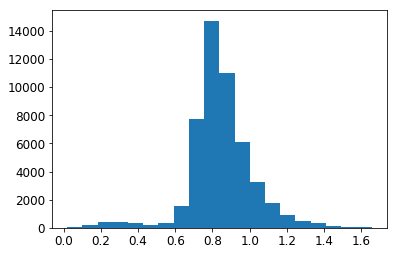

In [188]:
plt.hist(pred['nn_redshift'],bins=20)

(array([ 0.3184601 ,  0.31432425,  0.37360471,  0.38463363,  0.47424361,
         0.46941846,  0.52594168,  0.66311389,  0.71343334,  0.78305341,
         0.86714893,  0.95882684,  1.06153367,  1.23523918,  1.38068307,
         1.49648675,  1.69018218,  1.85837322,  2.0927378 ,  2.34088853]),
 array([ 21.82510567,  21.87509985,  21.92509403,  21.97508821,
         22.0250824 ,  22.07507658,  22.12507076,  22.17506495,
         22.22505913,  22.27505331,  22.32504749,  22.37504168,
         22.42503586,  22.47503004,  22.52502422,  22.57501841,
         22.62501259,  22.67500677,  22.72500095,  22.77499514,  22.82498932]),
 <a list of 1 Patch objects>)

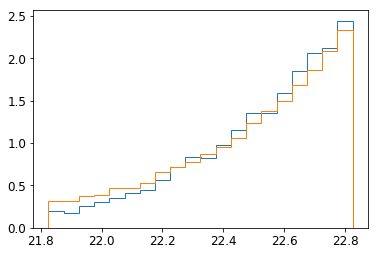

In [186]:
plt.hist(g[color_sgc_pred],**kwargs)
flag,sgc_elg = ELG_selection_for_dr3(output_sgc,region='sgc')
g_sgc_elg = 22.5 - 2.5 * np.log10(sgc_elg['DECAM_FLUX'][:,1] / sgc_elg['DECAM_MW_TRANSMISSION'][:,1])
plt.hist(g_sgc_elg,**kwargs)

In [108]:
set(output['TYPE'])

{'COMP', 'DEV ', 'EXP ', 'PSF ', 'SIMP'}

In [109]:
output['TYPE'] == 'EXP '

array([ True, False,  True, ...,  True,  True, False], dtype=bool)

In [122]:
len(sweep_dat)

TypeError: object of type 'NoneType' has no len()